In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import plotly.express as px
import plotly.graph_objects as go
from itertools import cycle
import plotly.subplots as sp
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

In [ ]:
import nltk
nltk.download('stopwords')
import string
import re
from nltk.corpus import stopwords
from nltk import PorterStemmer
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Ingnore the basic warnings like during importing modules that can be ignored or auto solve and won't effect the processing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/threads_reviews.csv')

In [ ]:
data

source                                 review_description  rating  \
0      Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1      Google Play  Pretty good for a first launch!! Its easy to u...       3   
2      Google Play  For a brand new app, it's very well optimized....       3   
3      Google Play  Great app with a lot of potential! However, th...       3   
4      Google Play  The app is good, but it needs a lot of functio...       3   
...            ...                                                ...     ...   
32905    App Store  This killed my dog. Mark zuckerburg strangled ...       1   
32906    App Store              Add Search and hashtag like Twitter !       1   
32907    App Store                                        bad twister       1   
32908    App Store                       Yet another trash from Meta.       1   
32909    App Store  Nothing special this app is just a copy of twi...       1   

               review_date  
0      2023-07-08 14:18:24  
1      2023-07-19 20:52:48  
2      2023-07-06 23:03:11  
3      2023-07-10 00:53:25  
4      2023-07-06 16:57:43  
...                    ...  
32905  2023-07-06 01:23:55  
32906  2023-07-19 08:01:06  
32907  2023-07-17 06:39:13  
32908  2023-07-07 17:47:16  
32909  2023-07-07 07:01:43  

[32910 rows x 4 columns]

In [ ]:
data.shape

(32910, 4)

In [ ]:
data.duplicated().sum()

1

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(32909, 4)

In [ ]:
data.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32909 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32909 non-null  object
 1   review_description  32909 non-null  object
 2   rating              32909 non-null  int64 
 3   review_date         32909 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
data.describe()

rating
count  32909.000000
mean       3.398432
std        1.751484
min        1.000000
25%        1.000000
50%        4.000000
75%        5.000000
max        5.000000

In [ ]:
data['source'].unique()

array(['Google Play', 'App Store'], dtype=object)

In [ ]:
data['source'].value_counts()

Google Play    30270
App Store       2639
Name: source, dtype: int64

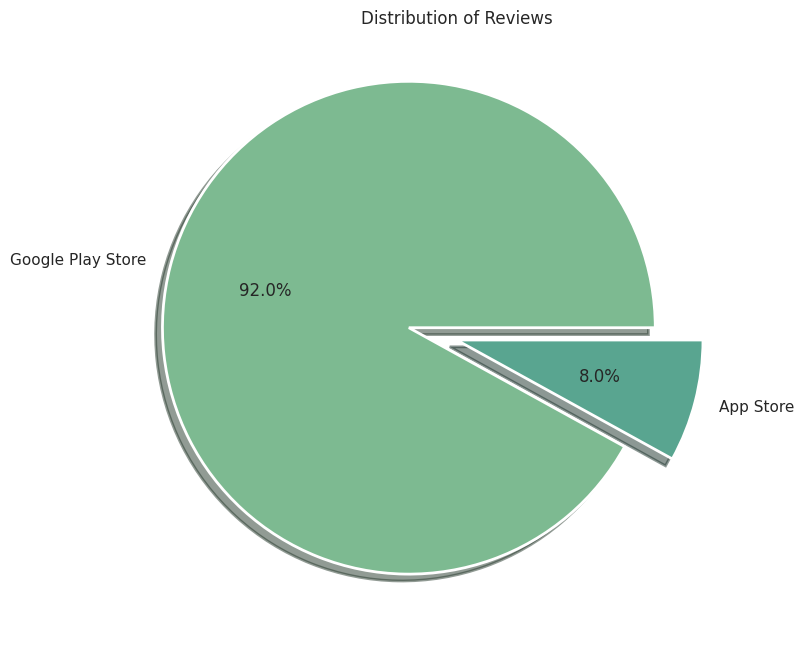

In [ ]:
'''counts = data['source'].value_counts()
plt.pie(counts,labels = counts.index,autopct='%1.0f%%')
plt.title("Sources")
plt.show()'''
sns.set_theme(palette = 'crest')
plt.figure(figsize=(8,8))
plt.pie(x = [len(data[data['source']=='Google Play']),
             len(data[data['source']=='App Store'])],
        shadow = True, wedgeprops={'linewidth':2,'edgecolor':'white'},explode=[0.2,0.0],
        labels = ['Google Play Store','App Store'],autopct='%1.1f%%')
plt.title('Distribution of Reviews')
plt.show()

In [ ]:
data['rating'].unique()

array([2, 3, 1, 5, 4])

In [ ]:
data['rating'].value_counts()

5    15558
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64

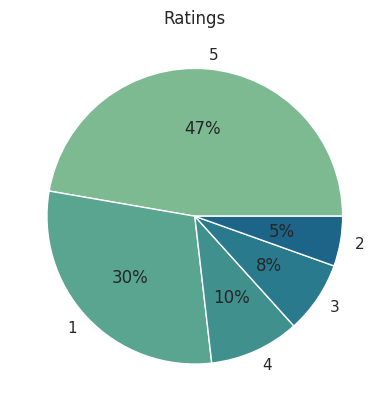

In [ ]:
count_rating = data['rating'].value_counts()
plt.pie(count_rating, labels = count_rating.index,autopct='%1.0f%%')
plt.title('Ratings')
plt.show()

In [ ]:
data_play_store = data[data['source']=='Google Play']['rating']
data_app_store = data[data['source']=='App Store']['rating']

In [ ]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=1,
    cols=3,
    horizontal_spacing = 0.1,
    subplot_titles=['Source','Google Play Store Ratings','App Store Ratings'],
    specs=[[{'type':'pie'}, {'type':'pie'},{'type':'pie'}]],
    vertical_spacing = 0.2
)


In [ ]:
source_counts = data.source.value_counts()


source_p = go.Pie(
    labels=source_counts.index,
    values=source_counts,
    name="Source",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(source_counts))],
    legendgroup="source",
    legendgrouptitle_text="Source",
)

gc = data_play_store.value_counts()

gc_pie = go.Pie(
    labels=gc.index,
    values=gc,
    name="Google Play",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(gc))],
    legendgroup="Google Play Store",
    legendgrouptitle_text="Google Play Store",
)


ios = data_app_store.value_counts()

ios_pie = go.Pie(
    labels=ios.index,
    values=ios,
    name="App Store",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(ios))],
    legendgroup="App Store",
    legendgrouptitle_text="App Store",
)

fig.add_trace(source_p, row=1, col=1)
fig.add_trace(gc_pie, row=1, col=2)
fig.add_trace(ios_pie, row=1, col=3)

fig.update_layout(
    template="plotly",
    height=430,
)

fig.update(
    layout_title_text="Source rating characteristics",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(247, 237, 229)',
    layout_plot_bgcolor='rgb(8,10,10)'
)

fig.show()

**From above figures and analysis we can conclude that - **
- The number of android user are very high comparitive to that of apple users.
- Most of the android users(around 50%) have given 5 start rating to thread, then 1 star rating is highly rated(around 30%)
- In the case of apple users mostly users have given 1 star rating(around 40%)
- percentage of rartings of 2, 3 and 4 stars are very low. Mostly users have given either 1 star or 5 star ratings.

<Axes: xlabel='rating', ylabel='count'>

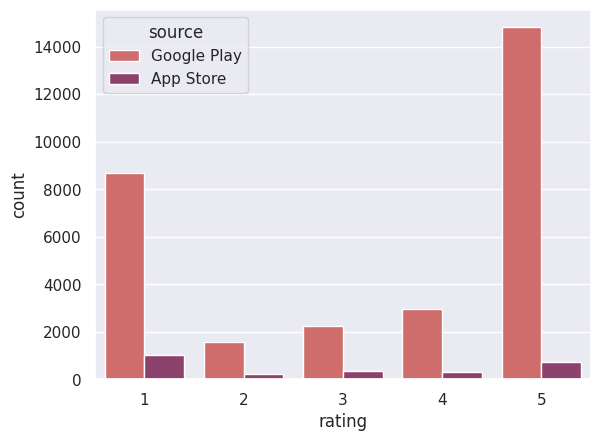

In [ ]:
sns.countplot(x=data['rating'],hue=data['source'],palette='flare')

In [ ]:
def new_label(point):
  if point == 4 or point == 3:
    return 'good'
  elif point == 1 or point == 2:
    return 'poor'
  else:
    return 'excellent'

data['label'] = data['rating'].apply(lambda r: new_label(r))

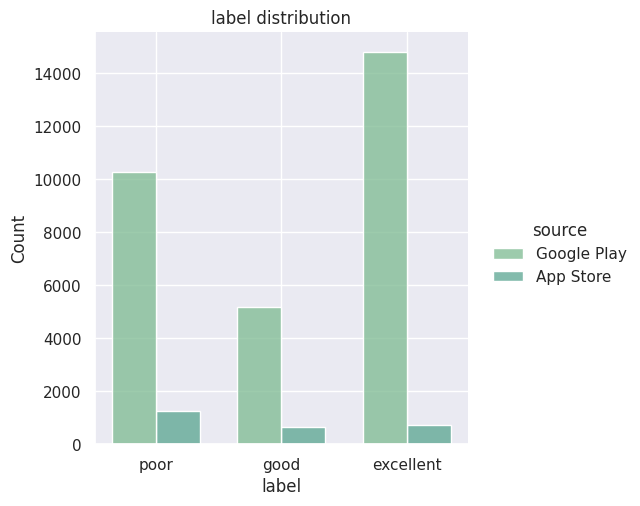

In [ ]:
sns.displot(data, x='label', shrink=0.7 ,hue='source', multiple="dodge", discrete=True)
plt.title("label distribution")
plt.show()

Creating a column to identify the total percentag of positive rating

In [ ]:
data['positive rating'] = np.where(data['rating']>3,1,0)

In [ ]:
data.sample(20)

source                                 review_description  rating  \
18570  Google Play                                    Not satisfied 😔       1   
18102  Google Play                Damn you for cheating on Twitter 🤦🤦       1   
24993  Google Play                                               Well       5   
28321  Google Play                                         Disgusting       1   
4378   Google Play  The app will crash when i want to post a pictu...       2   
23481  Google Play                                          Love this       5   
30162  Google Play  Wow , only 1.5 hour me 1 million user complete...       4   
31564    App Store  As soon as I got this app my Insta quit workin...       1   
21566  Google Play                                               Good       5   
3522   Google Play  It is so good and have so user friendly interf...       5   
8028   Google Play           It is gorgeous lnstagram app,l love it🤩🤩       5   
30348    App Store  First impressions were that Threads was a much...       2   
31246    App Store  Clean, smooth and “feel good” community. No ne...       5   
27583  Google Play                                               Good       1   
22609  Google Play                                           Nice app       5   
27502  Google Play                                               Good       5   
20328  Google Play                              Awesome Application 👉       5   
23901  Google Play                                               nice       5   
25626  Google Play                                               Real       5   
15618  Google Play  In order to delete your thread account;you hav...       1   

               review_date      label  positive rating  
18570  2023-07-19 01:46:44       poor                0  
18102  2023-07-07 21:44:28       poor                0  
24993  2023-07-06 09:11:03  excellent                1  
28321  2023-07-06 16:03:22       poor                0  
4378   2023-07-08 11:21:51       poor                0  
23481  2023-07-12 16:08:41  excellent                1  
30162  2023-07-09 09:46:56       good                1  
31564  2023-07-10 04:41:28       poor                0  
21566  2023-07-17 05:08:53  excellent                1  
3522   2023-07-06 17:40:27  excellent                1  
8028   2023-07-08 06:30:16  excellent                1  
30348  2023-07-10 01:59:32       poor                0  
31246  2023-07-07 06:51:25  excellent                1  
27583  2023-07-06 16:03:14       poor                0  
22609  2023-07-06 01:29:24  excellent                1  
27502  2023-07-06 04:08:37  excellent                1  
20328  2023-07-07 17:06:53  excellent                1  
23901  2023-07-07 12:35:02  excellent                1  
25626  2023-07-08 15:10:09  excellent                1  
15618  2023-07-07 17:35:28       poor                0

In [ ]:
data['positive rating'].mean()*100

57.13330699808563

Measuring the length of the reviews

In [ ]:
data['word_count'] = data['review_description'].str.split().str.len()
average_review_length = data.word_count.mean()
print("The average review lenght is",{round(average_review_length)},"words")

The average review lenght is {12} words


In [ ]:
for x in range(5,0,-1):
  print("The average word count for",x,"star rating is:",data[data.rating ==x].word_count.mean().round(2))

The average word count for 5 star rating is: 6.76
The average word count for 4 star rating is: 16.62
The average word count for 3 star rating is: 22.16
The average word count for 2 star rating is: 23.57
The average word count for 1 star rating is: 14.91


Closly looking towards the ratings

In [ ]:
def deEmojfy(inputString):
  return inputString.encode('ascii','ignore').decode('ascii')

In [ ]:
def clean_text(text):
    ps=PorterStemmer()
    text=deEmojfy(text)  # removing emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # removing punctuations

    text_cleaned=re.sub(' +',' ',text_cleaned)  # removing white spaces
    text_cleaned=text_cleaned.lower()           # convert into lower case

    tokens=text_cleaned.split(" ")             # split into words
    STOPWORDS=stopwords.words('english')
    tokens=[token for token in tokens if token not in STOPWORDS]  # taking the words those are not stopwords

    text_cleaned=" ".join([ps.stem(token) for token in tokens])  # applying the stemming

    return text_cleaned

In [ ]:
data['cleaned_reviews'] = data['review_description'].apply(lambda x:clean_text(x))
data

source                                 review_description  rating  \
0      Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1      Google Play  Pretty good for a first launch!! Its easy to u...       3   
2      Google Play  For a brand new app, it's very well optimized....       3   
3      Google Play  Great app with a lot of potential! However, th...       3   
4      Google Play  The app is good, but it needs a lot of functio...       3   
...            ...                                                ...     ...   
32905    App Store  This killed my dog. Mark zuckerburg strangled ...       1   
32906    App Store              Add Search and hashtag like Twitter !       1   
32907    App Store                                        bad twister       1   
32908    App Store                       Yet another trash from Meta.       1   
32909    App Store  Nothing special this app is just a copy of twi...       1   

               review_date label  positive rating  word_count  \
0      2023-07-08 14:18:24  poor                0          85   
1      2023-07-19 20:52:48  good                0          81   
2      2023-07-06 23:03:11  good                0          91   
3      2023-07-10 00:53:25  good                0          94   
4      2023-07-06 16:57:43  good                0          79   
...                    ...   ...              ...         ...   
32905  2023-07-06 01:23:55  poor                0          12   
32906  2023-07-19 08:01:06  poor                0           7   
32907  2023-07-17 06:39:13  poor                0           2   
32908  2023-07-07 17:47:16  poor                0           5   
32909  2023-07-07 07:01:43  poor                0          10   

                                         cleaned_reviews  
0      meh greatest experi chromebook seem custom pho...  
1      pretti good first launch easi use selfexplanat...  
2      brand new app well optim howev miss quit featu...  
3      great app lot potenti howev lot need fix examp...  
4      app good need lot function exampl search topic...  
...                                                  ...  
32905          kill dog mark zuckerburg strangl dog gone  
32906                   add search hashtag like twitter   
32907                                        bad twister  
32908                               yet anoth trash meta  
32909                      noth special app copi twitter  

[32909 rows x 8 columns]

**Google Play Store**

For 1 star rating

In [ ]:
a = data[data['rating']==1]
a1 = a[a['source']=="Google Play"]
a1

source                                 review_description  rating  \
6      Google Play  I still don’t want to see content from people ...       1   
12     Google Play  Pointless in following anyone. The feed algo w...       1   
24     Google Play  Constant crashing when trying to upload most p...       1   
28     Google Play  As soon as I opened the app, it went good, the...       1   
33     Google Play  I don't normally write reviews but I'm so anno...       1   
...            ...                                                ...     ...   
30257  Google Play                                            👎👎👎👎👎👎👎       1   
30259  Google Play                                           ❤❤❤❤❤❤❤❤       1   
30263  Google Play                                       🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮🤮       1   
30268  Google Play                                                🥶🥶🥶       1   
30269  Google Play                                                 ☠☠       1   

               review_date label  positive rating  word_count  \
6      2023-07-19 19:35:31  poor                0          81   
12     2023-07-14 16:15:10  poor                0          77   
24     2023-07-09 19:04:24  poor                0          63   
28     2023-07-06 16:13:41  poor                0          71   
33     2023-07-11 21:58:36  poor                0          56   
...                    ...   ...              ...         ...   
30257  2023-07-23 11:51:55  poor                0           1   
30259  2023-07-06 15:07:27  poor                0           1   
30263  2023-07-14 14:21:25  poor                0           1   
30268  2023-07-24 12:09:46  poor                0           1   
30269  2023-07-24 16:39:42  poor                0           1   

                                         cleaned_reviews  
6      still dont want see content peopl dont specif ...  
12     pointless follow anyon feed algo wont show con...  
24     constant crash tri upload photo although doesn...  
28     soon open app went good login soon load could ...  
33     dont normal write review im annoy app ive tri ...  
...                                                  ...  
30257                                                     
30259                                                     
30263                                                     
30268                                                     
30269                                                     

[8698 rows x 8 columns]

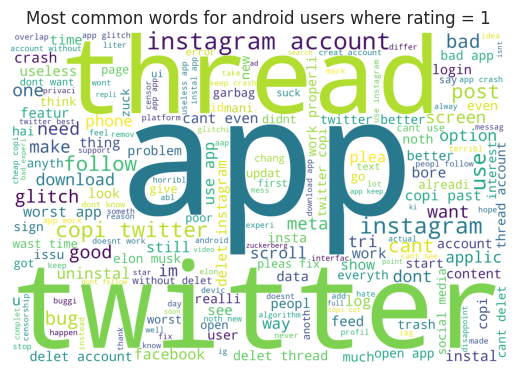

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(height=2000,width=3000,background_color='white')
wc = wc.generate(' '.join(a1['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating = 1")
plt.axis('off')
plt.show()

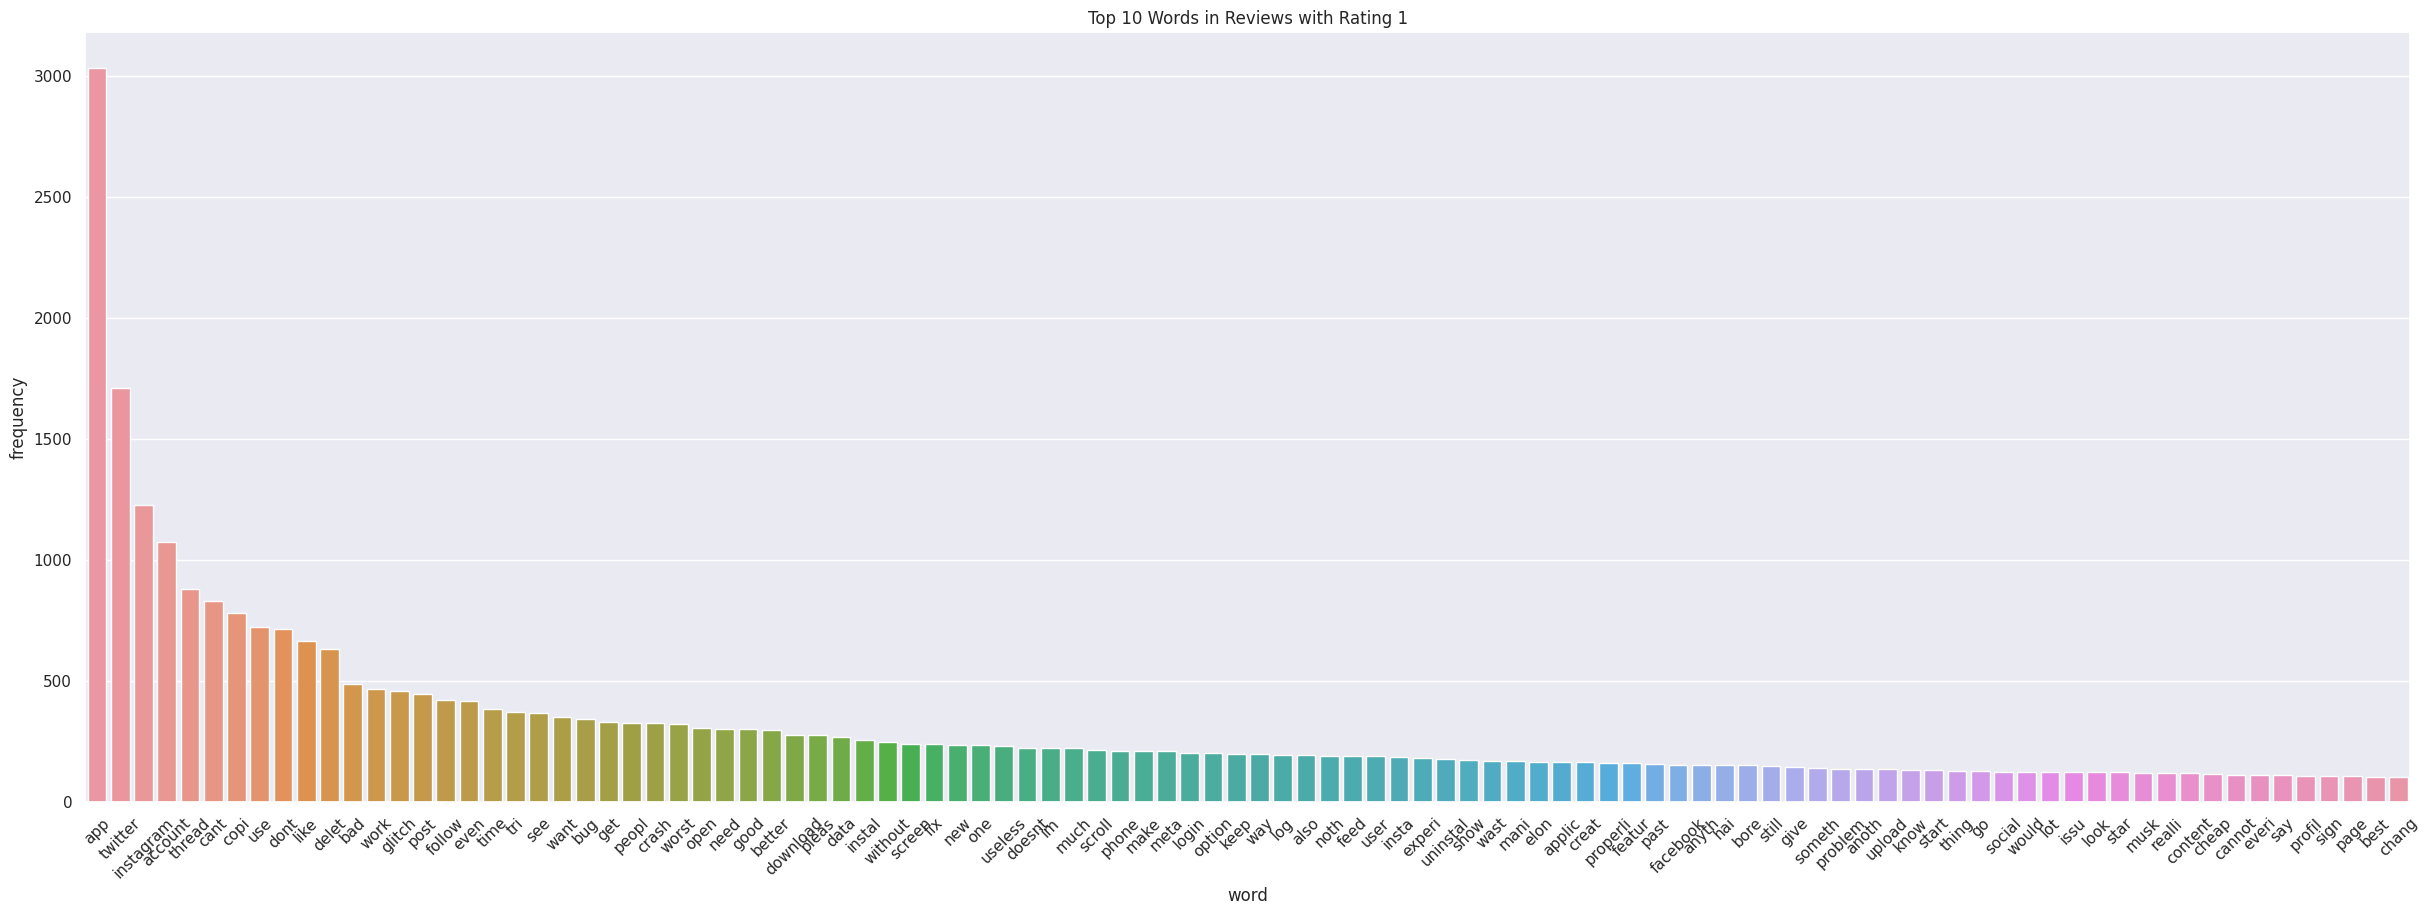

In [ ]:
def visualize(ratings):
  rating_d = data[data['rating']==1]
  rating_data = rating_d[rating_d['source']=='Google Play']
  word_counts = rating_data['cleaned_reviews'].str.split().explode().value_counts()
  word_count_data = pd.DataFrame(word_counts).reset_index()
  word_count_data.columns = ['word','frequency']
  word_count_data_vis = word_count_data.head(100)

  plt.figure(figsize=(30,10))
  sns.barplot(x='word',y='frequency',data=word_count_data_vis)
  plt.title(f"Top 10 Words in Reviews with Rating 1")
  plt.xticks(rotation=45)
  plt.show()

visualize(1) # rating = 1

For rating 2

In [ ]:
a =data[data['rating']==2]
a2 = a[a['source']=='Google Play']
a2

source                                 review_description  rating  \
0      Google Play  Meh. Not the greatest experience on a Chromebo...       2   
5      Google Play  Currently, it's very challenging to use. It's ...       2   
7      Google Play  Could be great if all pages loaded when you cl...       2   
10     Google Play  Over all, the UI of this app is good. Using it...       2   
13     Google Play  Not quite ready for prime time. Needs a feed s...       2   
...            ...                                                ...     ...   
30161  Google Play                                     Cloned Twitter       2   
30169  Google Play  twitter con más políticas restrictivas, buscad...       2   
30218  Google Play                                                😘😘😘       2   
30260  Google Play                                                 ❤️       2   
30262  Google Play                                              Clone       2   

               review_date label  positive rating  word_count  \
0      2023-07-08 14:18:24  poor                0          85   
5      2023-07-18 22:30:10  poor                0          75   
7      2023-07-06 14:35:15  poor                0          67   
10     2023-07-09 01:06:39  poor                0          83   
13     2023-07-06 11:53:02  poor                0          65   
...                    ...   ...              ...         ...   
30161  2023-07-24 11:18:52  poor                0           2   
30169  2023-07-08 22:11:58  poor                0          51   
30218  2023-07-13 06:15:14  poor                0           1   
30260  2023-07-24 16:51:34  poor                0           1   
30262  2023-07-25 07:02:43  poor                0           1   

                                         cleaned_reviews  
0      meh greatest experi chromebook seem custom pho...  
5      current challeng use dark mode want chang brig...  
7      could great page load click sometim dont post ...  
10     ui app good use easi visual clean unfortun fai...  
13     quit readi prime time need feed specif account...  
...                                                  ...  
30161                                      clone twitter  
30169  twitter con ms poltica restrictiva buscador qu...  
30218                                                     
30260                                                     
30262                                              clone  

[1571 rows x 8 columns]

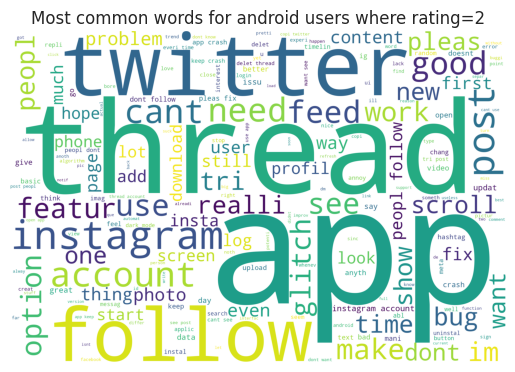

In [ ]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(a2['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating=2")
plt.axis('off')
plt.show()

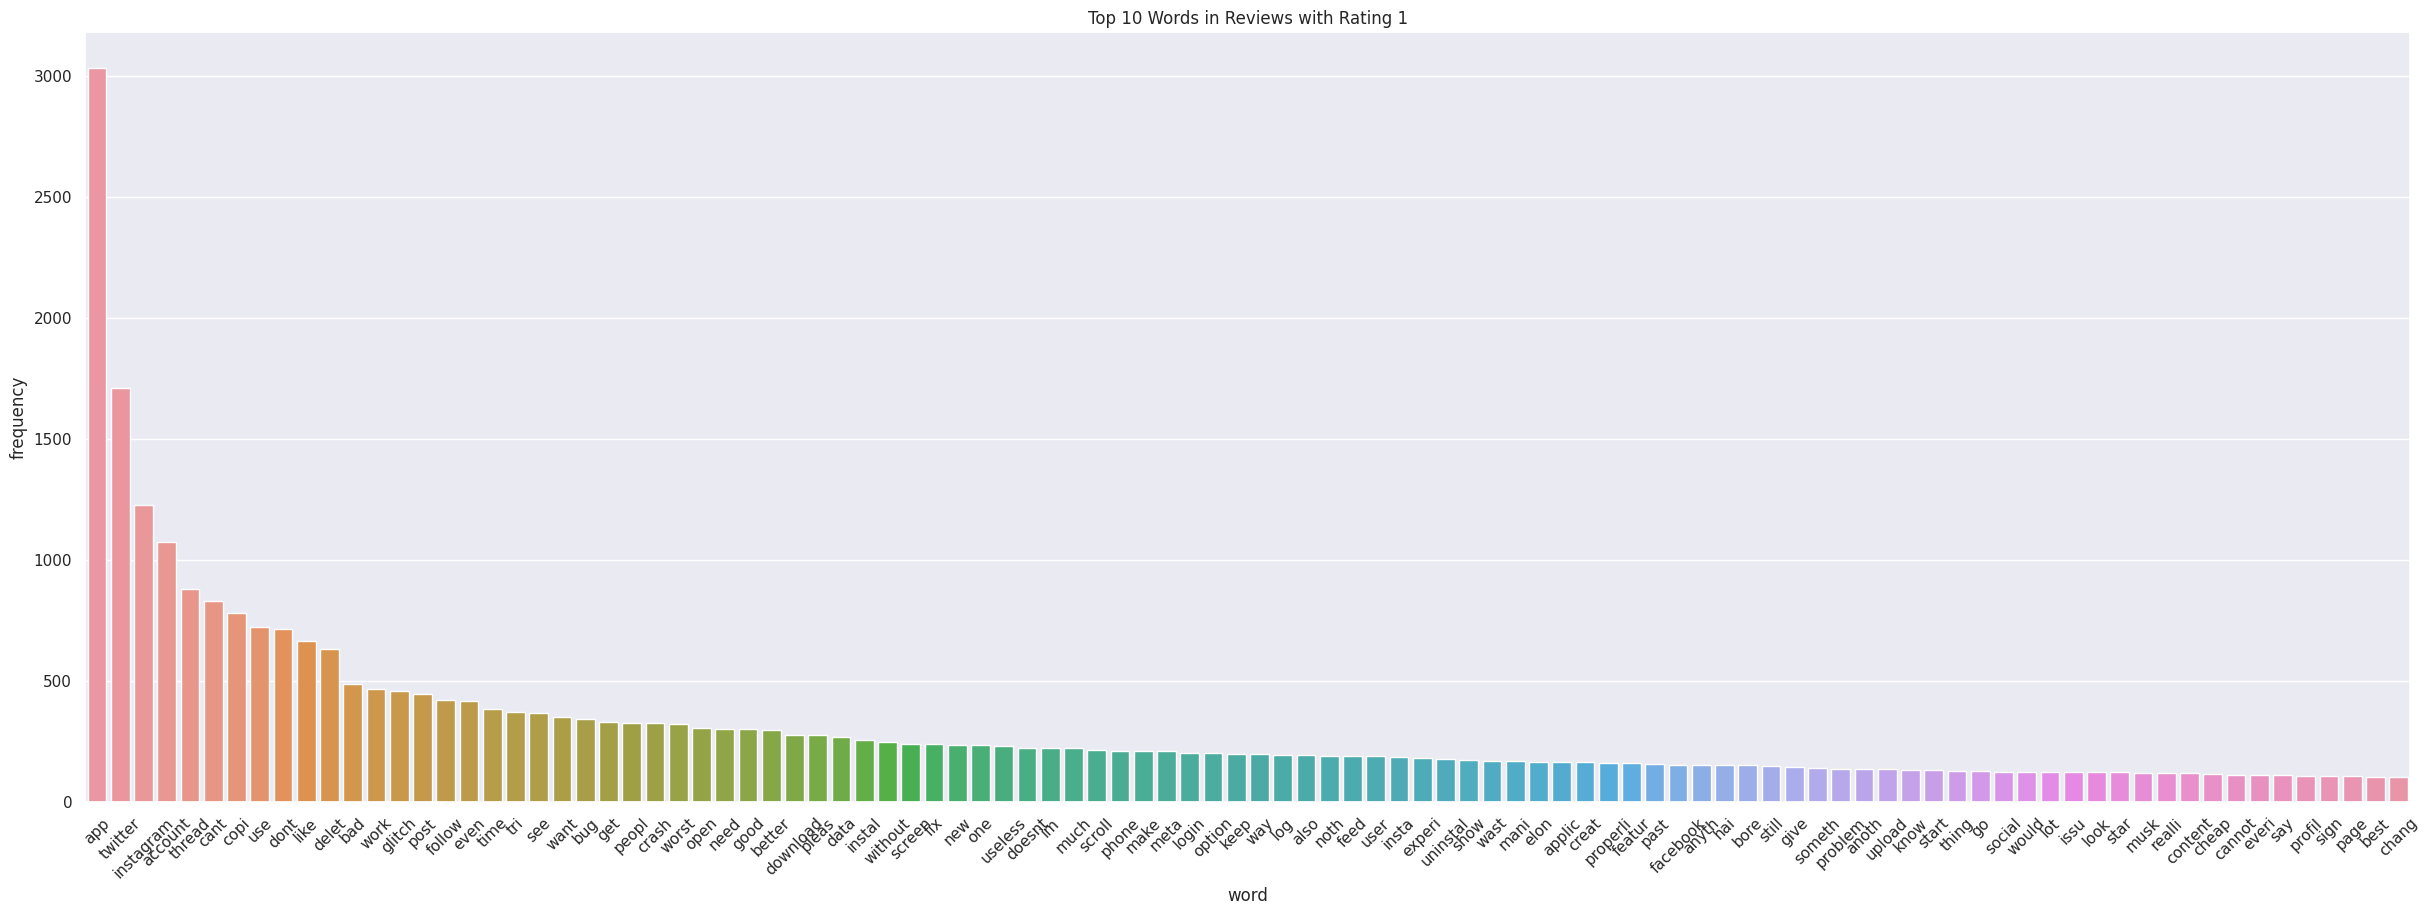

In [ ]:
visualize(2)

In [ ]:
a = data[data['rating']==3]
a3 = a[a['source']=='Google Play']
a3

source                                 review_description  rating  \
1      Google Play  Pretty good for a first launch!! Its easy to u...       3   
2      Google Play  For a brand new app, it's very well optimized....       3   
3      Google Play  Great app with a lot of potential! However, th...       3   
4      Google Play  The app is good, but it needs a lot of functio...       3   
8      Google Play  I'm liking the concept! There is room for impr...       3   
...            ...                                                ...     ...   
30066  Google Play                                                  🙄       3   
30068  Google Play                                                  🖤       3   
30074  Google Play                                                  👍       3   
30088  Google Play                                                  👍       3   
30267  Google Play                                               is a       3   

               review_date label  positive rating  word_count  \
1      2023-07-19 20:52:48  good                0          81   
2      2023-07-06 23:03:11  good                0          91   
3      2023-07-10 00:53:25  good                0          94   
4      2023-07-06 16:57:43  good                0          79   
8      2023-07-09 03:27:39  good                0          86   
...                    ...   ...              ...         ...   
30066  2023-07-06 15:25:57  good                0           1   
30068  2023-07-08 05:55:46  good                0           1   
30074  2023-07-06 15:06:07  good                0           1   
30088  2023-07-09 07:10:13  good                0           1   
30267  2023-07-17 14:07:32  good                0           2   

                                         cleaned_reviews  
1      pretti good first launch easi use selfexplanat...  
2      brand new app well optim howev miss quit featu...  
3      great app lot potenti howev lot need fix examp...  
4      app good need lot function exampl search topic...  
8      im like concept room improv though everytim tr...  
...                                                  ...  
30066                                                     
30068                                                     
30074                                                     
30088                                                     
30267                                                     

[2242 rows x 8 columns]

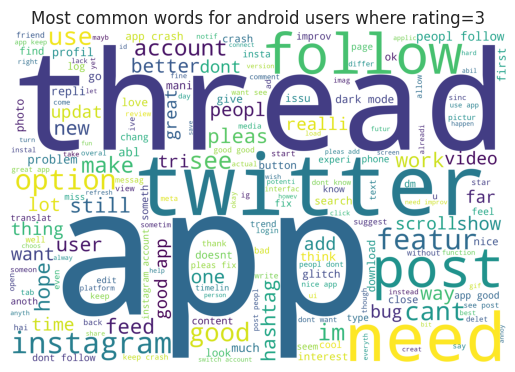

In [ ]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(a3['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating=3")
plt.axis('off')
plt.show()

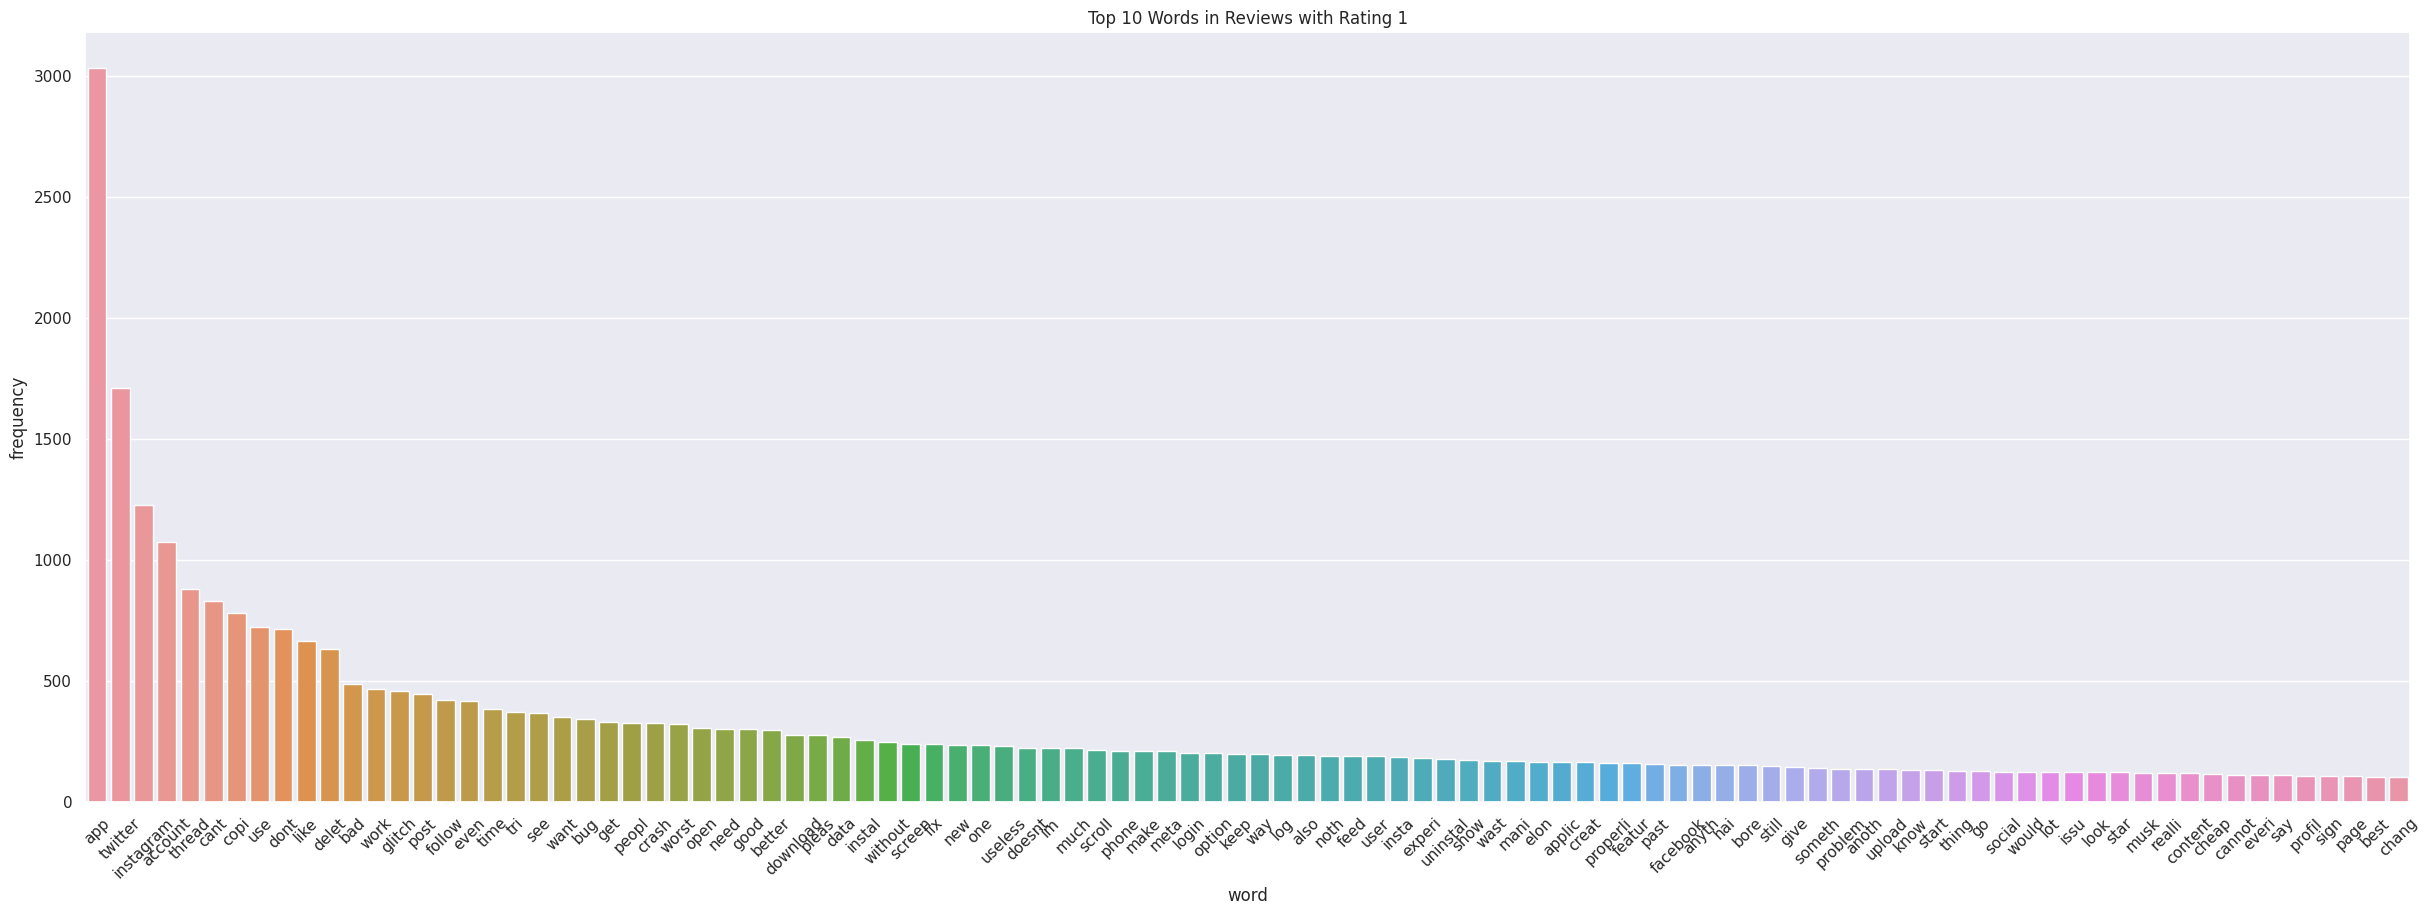

In [ ]:
visualize(3)

In [ ]:
a = data[data['rating']==4]
a4 = a[a['source']=='Google Play']
a4

source                                 review_description  rating  \
22     Google Play  It's not bad so far. A handful of unsolicited ...       4   
29     Google Play  Great App! Loved it from the very first day al...       4   
32     Google Play  It's addicting but feels cramped and messy bec...       4   
41     Google Play  Yes, the app is excellent. My experience with ...       4   
66     Google Play  I think it's a decent start. Some features I t...       4   
...            ...                                                ...     ...   
30173  Google Play                                                 J4       4   
30224  Google Play                                               👍👍👍👍       4   
30225  Google Play                                               🙈🙈🙈🙈       4   
30226  Google Play                                               👍👍👍👍       4   
30248  Google Play                                            🤩🤩🤩🤩🤩🤩🤩       4   

               review_date label  positive rating  word_count  \
22     2023-07-07 20:00:49  good                1          78   
29     2023-07-11 12:50:24  good                1          90   
32     2023-07-07 07:16:59  good                1          63   
41     2023-07-06 10:38:10  good                1          76   
66     2023-07-09 18:26:14  good                1          87   
...                    ...   ...              ...         ...   
30173  2023-07-24 06:12:50  good                1           1   
30224  2023-07-06 18:36:19  good                1           1   
30225  2023-07-06 20:26:46  good                1           1   
30226  2023-07-07 08:34:33  good                1           1   
30248  2023-07-09 04:08:39  good                1           1   

                                         cleaned_reviews  
22     bad far hand unsolicit request theyr easi desp...  
29     great app love first day although follow chall...  
32     addict feel cramp messi unnecessari element li...  
41     ye app excel experi app fantast know new chall...  
66     think decent start featur think would import g...  
...                                                  ...  
30173                                                 j4  
30224                                                     
30225                                                     
30226                                                     
30248                                                     

[2944 rows x 8 columns]

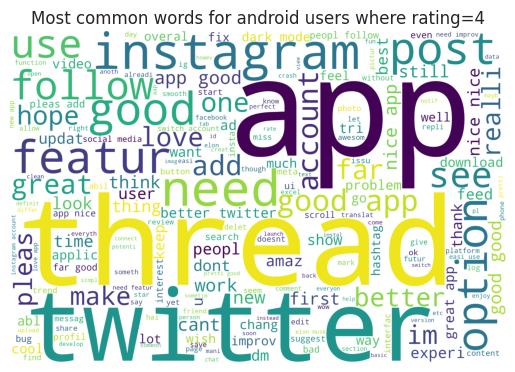

In [ ]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(a4['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating=4")
plt.axis('off')
plt.show()

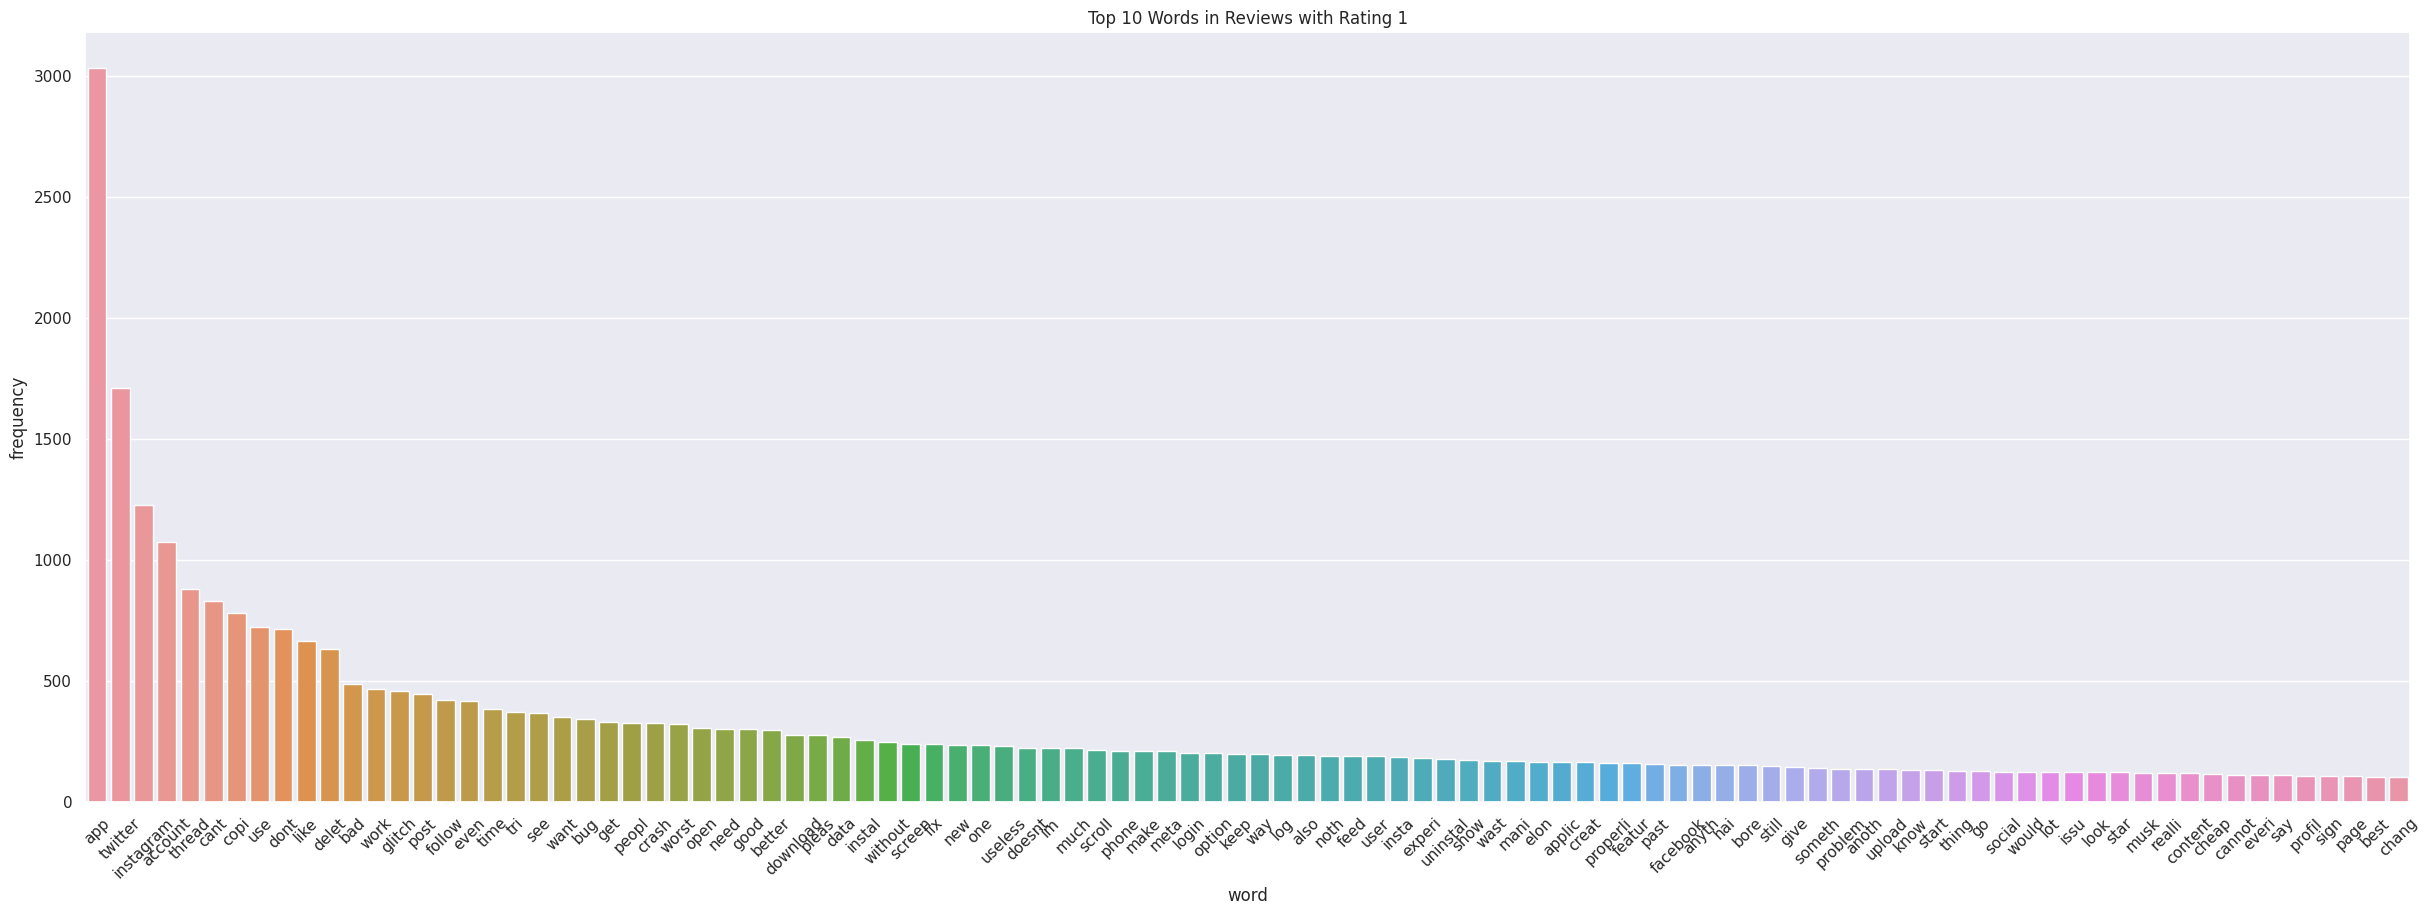

In [ ]:
visualize(4)

In [ ]:
a = data[data['rating']==5]
a5 = a[a['source']=='Google Play']
a5

source                                 review_description  rating  \
9      Google Play  Not bad! This is its first launch. There is st...       5   
21     Google Play  Firstly, I want to express my appreciation for...       5   
52     Google Play  The first day on the app has been really good-...       5   
94     Google Play  Off to a great start! This is a great alternat...       5   
137    Google Play  Absolutely great. For a first version this has...       5   
...            ...                                                ...     ...   
30258  Google Play                                           🔥🔥🔥🔥🔥🔥🔥🔥       5   
30261  Google Play                                          👍👍👍👍👍👍👍👍👍       5   
30264  Google Play                                      galeng galeng       5   
30265  Google Play                                            طرش طرش       5   
30266  Google Play                               Mice app salman khan       5   

               review_date      label  positive rating  word_count  \
9      2023-07-06 23:41:13  excellent                1          55   
21     2023-07-06 18:39:12  excellent                1          74   
52     2023-07-06 13:13:54  excellent                1          65   
94     2023-07-06 17:11:26  excellent                1          83   
137    2023-07-06 23:15:47  excellent                1          63   
...                    ...        ...              ...         ...   
30258  2023-07-07 05:22:55  excellent                1           1   
30261  2023-07-11 10:52:56  excellent                1           1   
30264  2023-07-06 11:57:37  excellent                1           2   
30265  2023-07-06 09:16:22  excellent                1           2   
30266  2023-07-24 15:07:41  excellent                1           4   

                                         cleaned_reviews  
9      bad first launch still room improv would like ...  
21     firstli want express appreci overal concept th...  
52     first day app realli good havent notic bad bug...  
94     great start great altern textbas social media ...  
137    absolut great first version good far keep aban...  
...                                                  ...  
30258                                                     
30261                                                     
30264                                      galeng galeng  
30265                                                     
30266                               mice app salman khan  

[14815 rows x 8 columns]

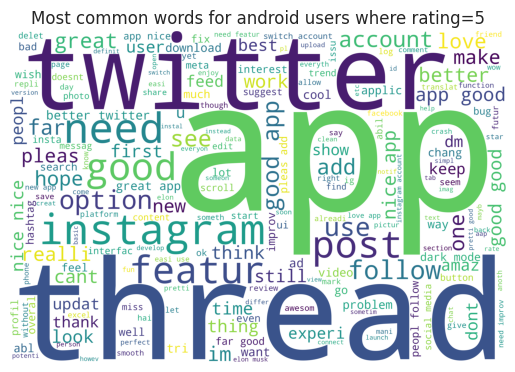

In [ ]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(a4['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for android users where rating=5")
plt.axis('off')
plt.show()

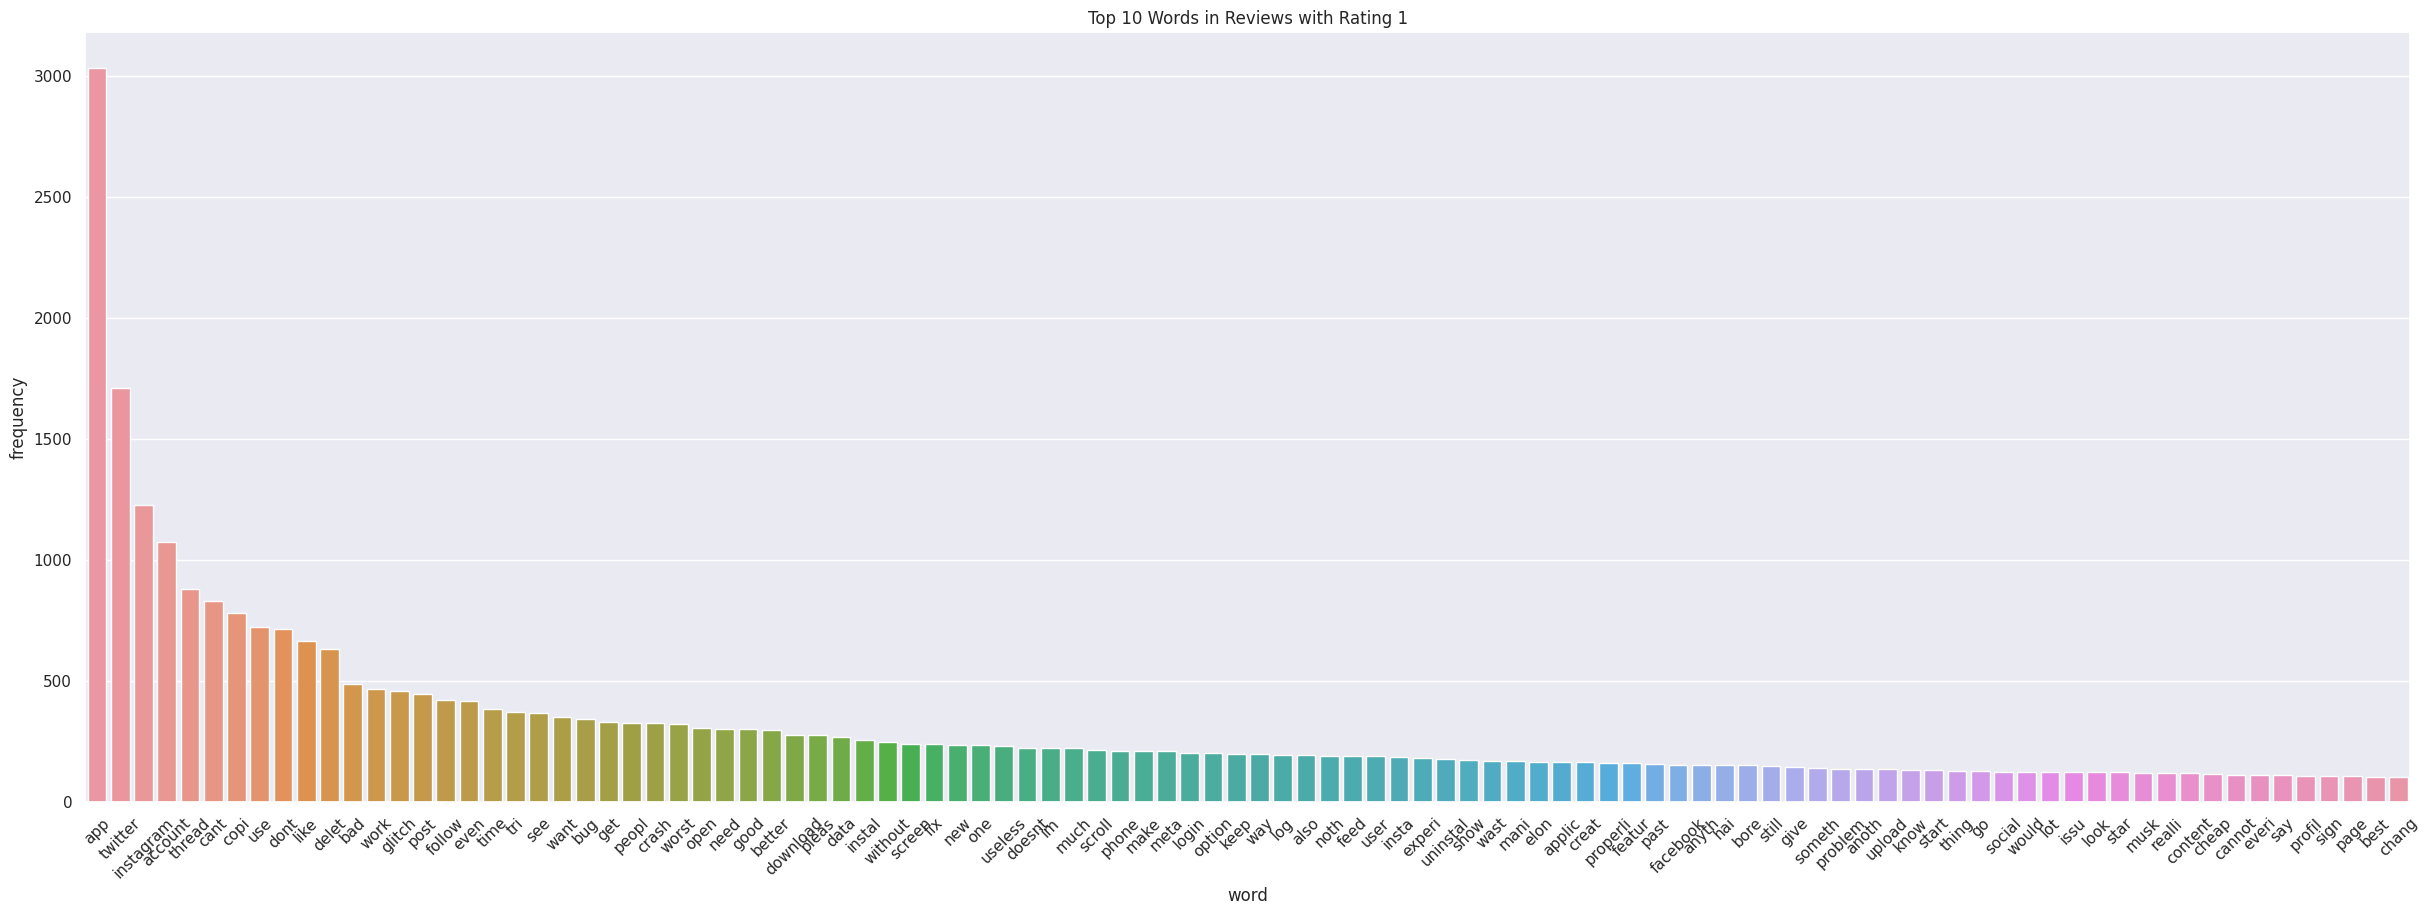

In [ ]:
visualize(5)

Analysis for App Store

Rating 1

In [ ]:
i = data[data['rating']==1]
i1 = i[i['source']=="App Store"]
i1

source                                 review_description  rating  \
30273  App Store  Its like Twitter... only its called Threads. T...       1   
30274  App Store  If i could give it 0 stars I would. There are ...       1   
30287  App Store  App that was definitely just dropped because p...       1   
30291  App Store  Twitter is better, and this app is horrible. T...       1   
30293  App Store  I was scrolling on my feed liking posts when I...       1   
...          ...                                                ...     ...   
32905  App Store  This killed my dog. Mark zuckerburg strangled ...       1   
32906  App Store              Add Search and hashtag like Twitter !       1   
32907  App Store                                        bad twister       1   
32908  App Store                       Yet another trash from Meta.       1   
32909  App Store  Nothing special this app is just a copy of twi...       1   

               review_date label  positive rating  word_count  \
30273  2023-07-18 22:31:24  poor                0         259   
30274  2023-07-08 06:05:30  poor                0         242   
30287  2023-07-10 18:11:49  poor                0         180   
30291  2023-07-23 07:56:41  poor                0         177   
30293  2023-07-06 14:06:52  poor                0         167   
...                    ...   ...              ...         ...   
32905  2023-07-06 01:23:55  poor                0          12   
32906  2023-07-19 08:01:06  poor                0           7   
32907  2023-07-17 06:39:13  poor                0           2   
32908  2023-07-07 17:47:16  poor                0           5   
32909  2023-07-07 07:01:43  poor                0          10   

                                         cleaned_reviews  
30273  like twitter call thread immedi vibe got inten...  
30274  could give 0 star would mani issu app first co...  
30287  app definit drop peopl fuss twitter dont get w...  
30291  twitter better app horribl thread deserv 1 sta...  
30293  scroll feed like post suddenli got ban spam de...  
...                                                  ...  
32905          kill dog mark zuckerburg strangl dog gone  
32906                   add search hashtag like twitter   
32907                                        bad twister  
32908                               yet anoth trash meta  
32909                      noth special app copi twitter  

[1028 rows x 8 columns]

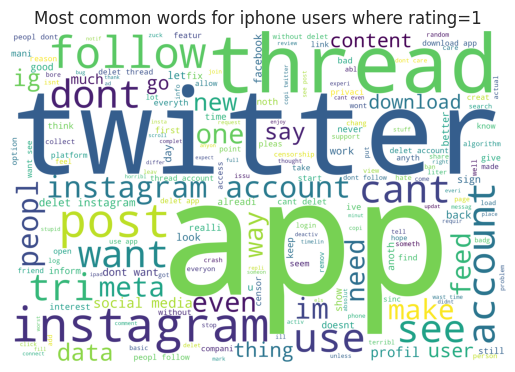

In [ ]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i1['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=1")
plt.axis('off')
plt.show()


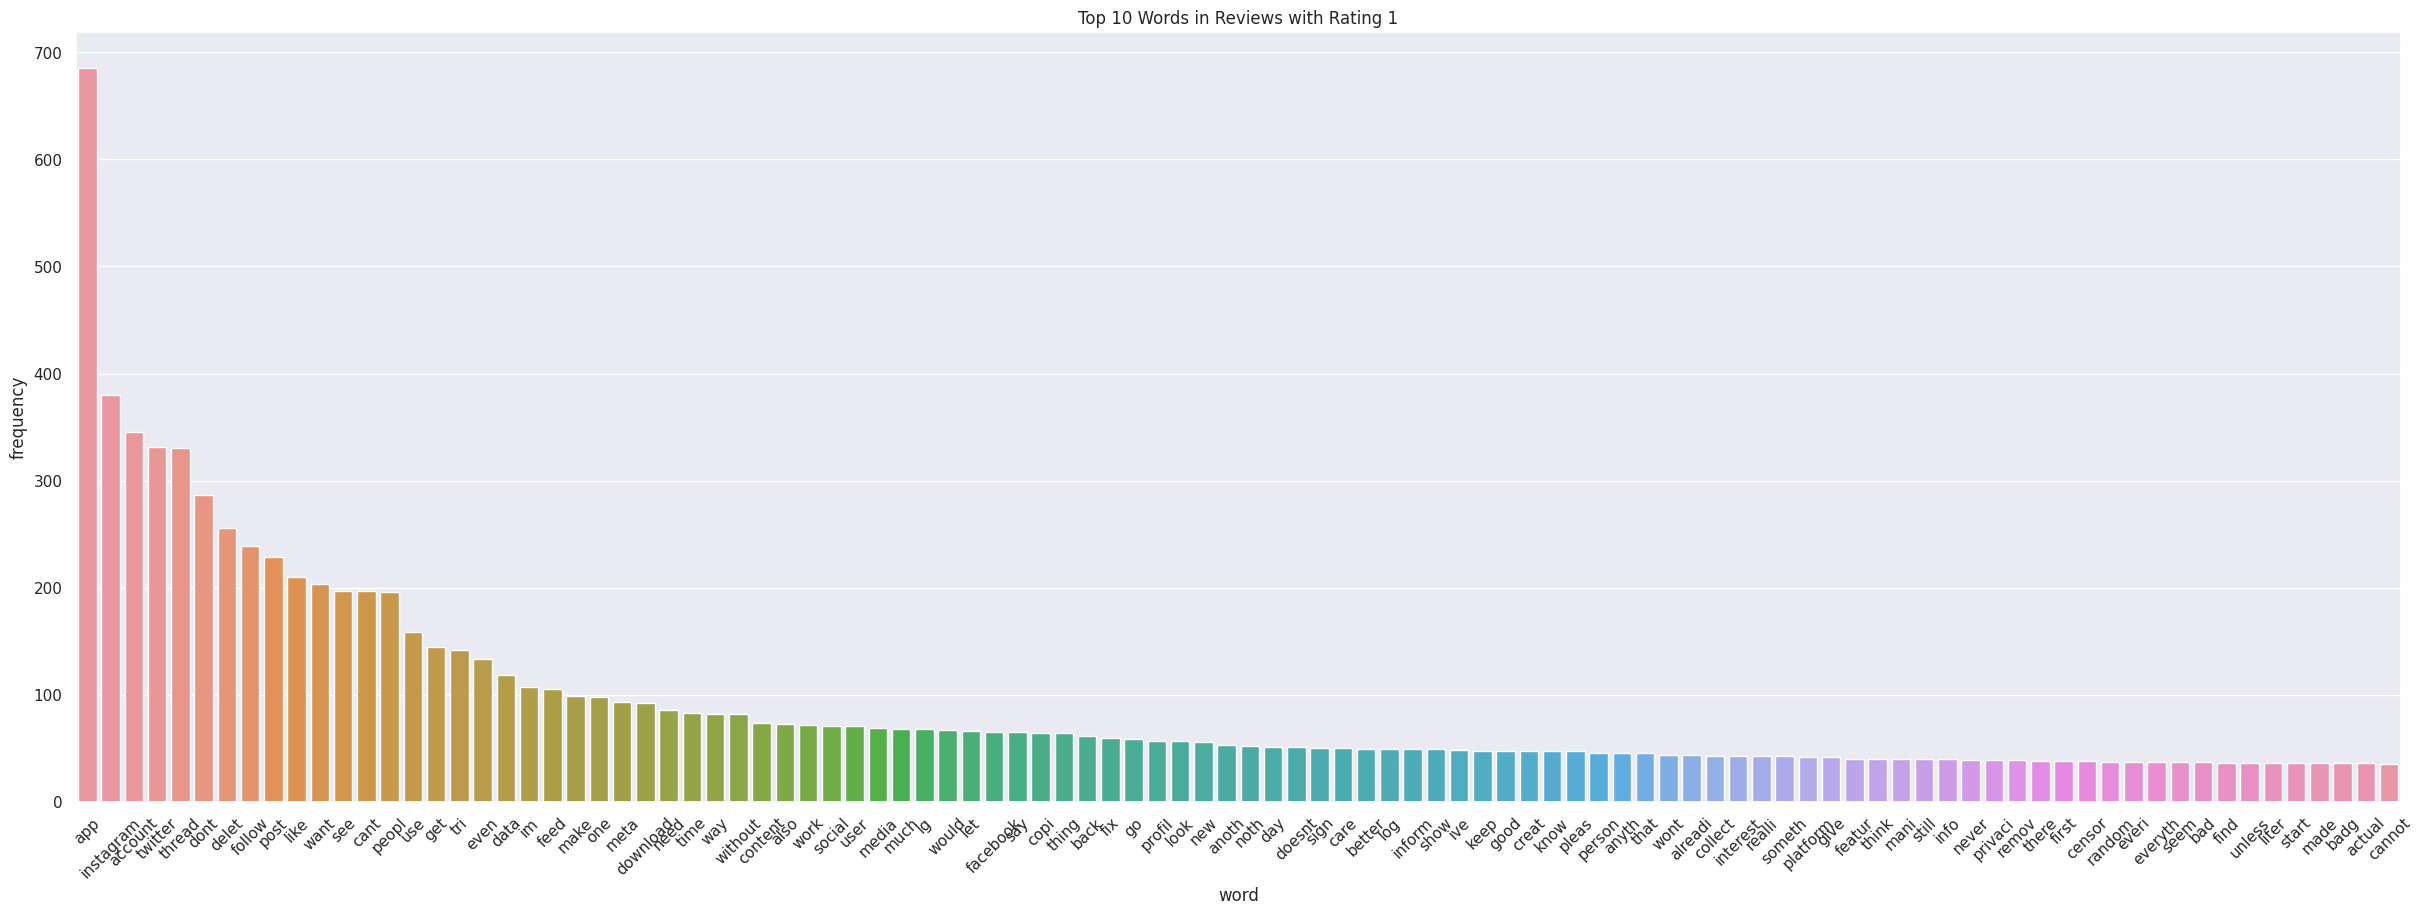

In [ ]:
def visualize_appstore(ratings):
  rating_d = data[data['rating']==1]
  rating_data = rating_d[rating_d['source']=='App Store']
  word_counts = rating_data['cleaned_reviews'].str.split().explode().value_counts()
  word_count_data = pd.DataFrame(word_counts).reset_index()
  word_count_data.columns = ['word','frequency']
  word_count_data_vis = word_count_data.head(100)

  plt.figure(figsize=(30,10))
  sns.barplot(x='word',y='frequency',data=word_count_data_vis)
  plt.title(f"Top 10 Words in Reviews with Rating 1")
  plt.xticks(rotation=45)
  plt.show()

visualize_appstore(1)

for rating 2


In [ ]:
i = data[data['rating']==2]
i2 = i[i['source']=="App Store"]
i2

source                                 review_description  rating  \
30272  App Store  I’ve been hoping for something to replace Twit...       2   
30284  App Store  I managed to make a few posts, comments, and s...       2   
30286  App Store  The poor performance of the service was the wo...       2   
30294  App Store  Briefly speaking, this app is decent overall, ...       2   
30309  App Store  99% of my feed is from people I’m not followin...       2   
...          ...                                                ...     ...   
32834  App Store  Suppression of Free Speech. What a Orwellian w...       2   
32842  App Store  i need to see post of people i follow not rand...       2   
32878  App Store             Please make an iPadOS specific version       2   
32880  App Store                             Worst app ever created       2   
32888  App Store  i don’t want to see the posts of ppl i’m not f...       2   

               review_date label  positive rating  word_count  \
30272  2023-07-07 21:59:25  poor                0         258   
30284  2023-07-08 18:22:12  poor                0         172   
30286  2023-07-10 16:52:07  poor                0         161   
30294  2023-07-15 00:49:16  poor                0         147   
30309  2023-07-08 03:12:46  poor                0         154   
...                    ...   ...              ...         ...   
32834  2023-07-08 12:43:05  poor                0          11   
32842  2023-07-05 23:35:54  poor                0          16   
32878  2023-07-17 01:36:58  poor                0           6   
32880  2023-07-07 03:34:21  poor                0           4   
32888  2023-07-08 16:41:43  poor                0          14   

                                         cleaned_reviews  
30272  ive hope someth replac twitter facebook awhil ...  
30284  manag make post comment share start crash view...  
30286  poor perform servic worst part overal take way...  
30294  briefli speak app decent overal need updat lik...  
30309  99 feed peopl im follow forc lot big celebr co...  
...                                                  ...  
32834           suppress free speech orwellian work live  
32842  need see post peopl follow randomli post\nplea...  
32878                    pleas make ipado specif version  
32880                               worst app ever creat  
32888           dont want see post ppl im follow thank u  

[225 rows x 8 columns]

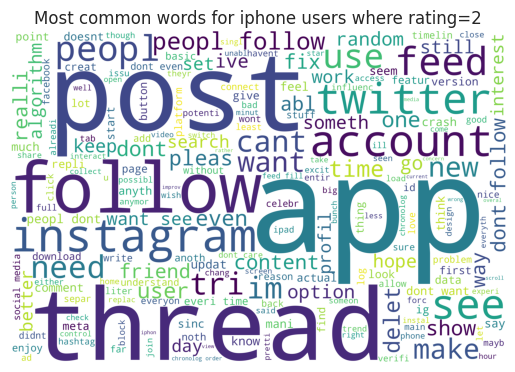

In [ ]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i2['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=2")
plt.axis('off')
plt.show()

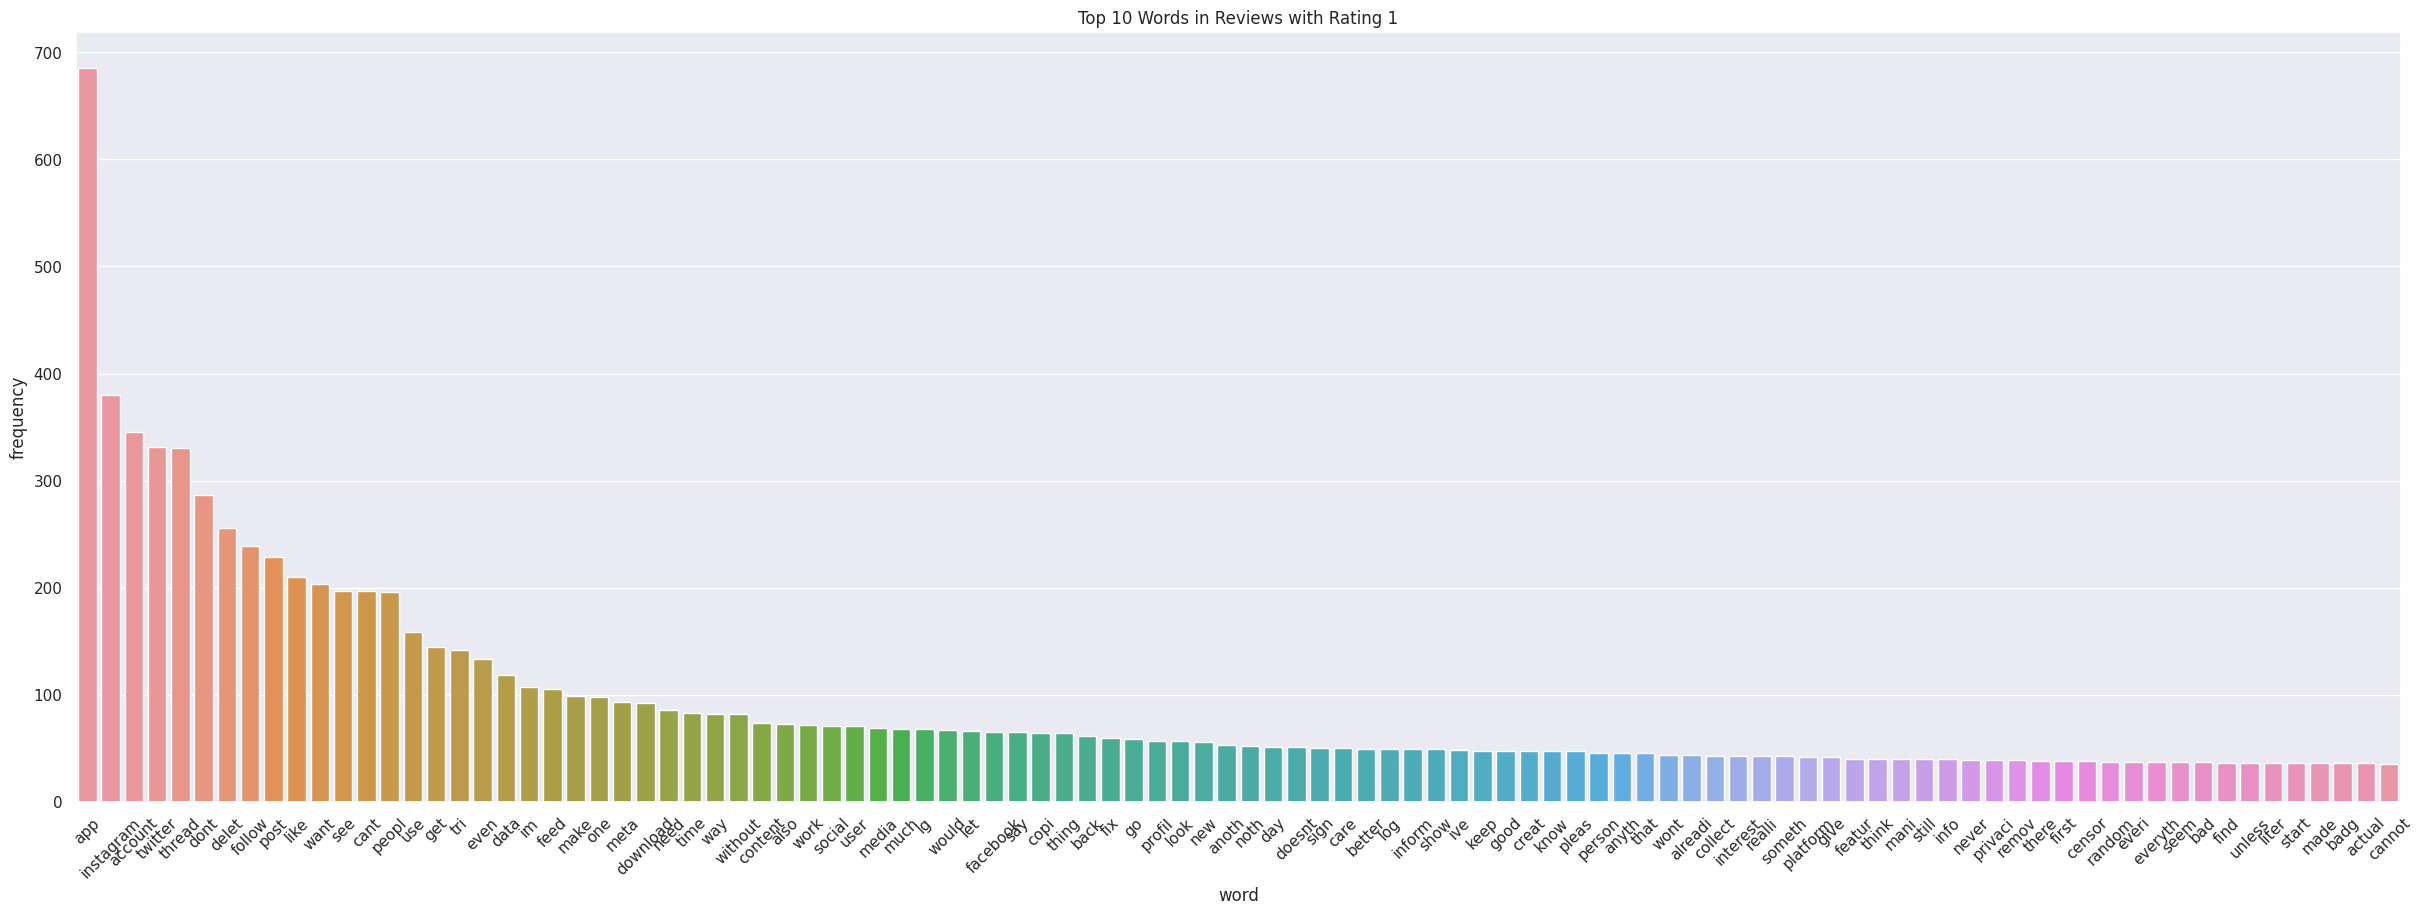

In [ ]:
visualize_appstore(2)

rating 3 star

In [ ]:
i=data[data["rating"]==3]
i3=i[i["source"]=="App Store"]
i3

source                                 review_description  rating  \
30271  App Store  this app has an amazing feel , i really enjoy ...       3   
30277  App Store  I will preface this by saying that I very rare...       3   
30278  App Store  I enjoyed the onboarding experience of bringin...       3   
30279  App Store  I'm rooting for a Twitter replacement but thre...       3   
30297  App Store  Zuck, my boy…if we’re gonna rake in the legal ...       3   
...          ...                                                ...     ...   
32857  App Store                       Please add arabic language .       3   
32862  App Store              Add gyphy - to reply 🙏 love new apps!       3   
32864  App Store            i really just wanna say anything i want       3   
32870  App Store  Threads is Twitter without a soul. It’s not tr...       3   
32875  App Store  kinda like this app, but pls put a gif search ...       3   

               review_date label  positive rating  word_count  \
30271  2023-07-09 05:35:44  good                0         302   
30277  2023-07-07 17:28:15  good                0         191   
30278  2023-07-07 05:40:39  good                0         196   
30279  2023-07-08 14:39:27  good                0         182   
30297  2023-07-08 07:38:58  good                0         151   
...                    ...   ...              ...         ...   
32857  2023-07-07 01:20:37  good                0           5   
32862  2023-07-06 04:16:35  good                0           9   
32864  2023-07-08 23:46:27  good                0           8   
32870  2023-07-06 05:50:41  good                0          11   
32875  2023-07-09 09:36:25  good                0          12   

                                         cleaned_reviews  
30271  app amaz feel realli enjoy layout gener thing ...  
30277  prefac say rare access social media use snapch...  
30278  enjoy onboard experi bring instagram follow fa...  
30279  im root twitter replac thread far extrem conne...  
30297  zuck boyif gonna rake legal troubl mimick grab...  
...                                                  ...  
32857                            pleas add arab languag   
32862                       add gyphi repli love new app  
32864                        realli wanna say anyth want  
32870      thread twitter without soul truli free speech  
32875              kinda like app pl put gif search bar   

[343 rows x 8 columns]

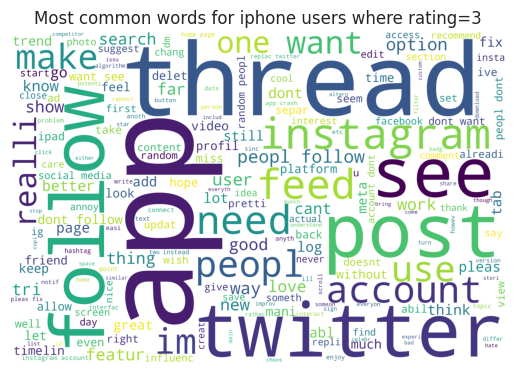

In [ ]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i3['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=3")
plt.axis('off')
plt.show()

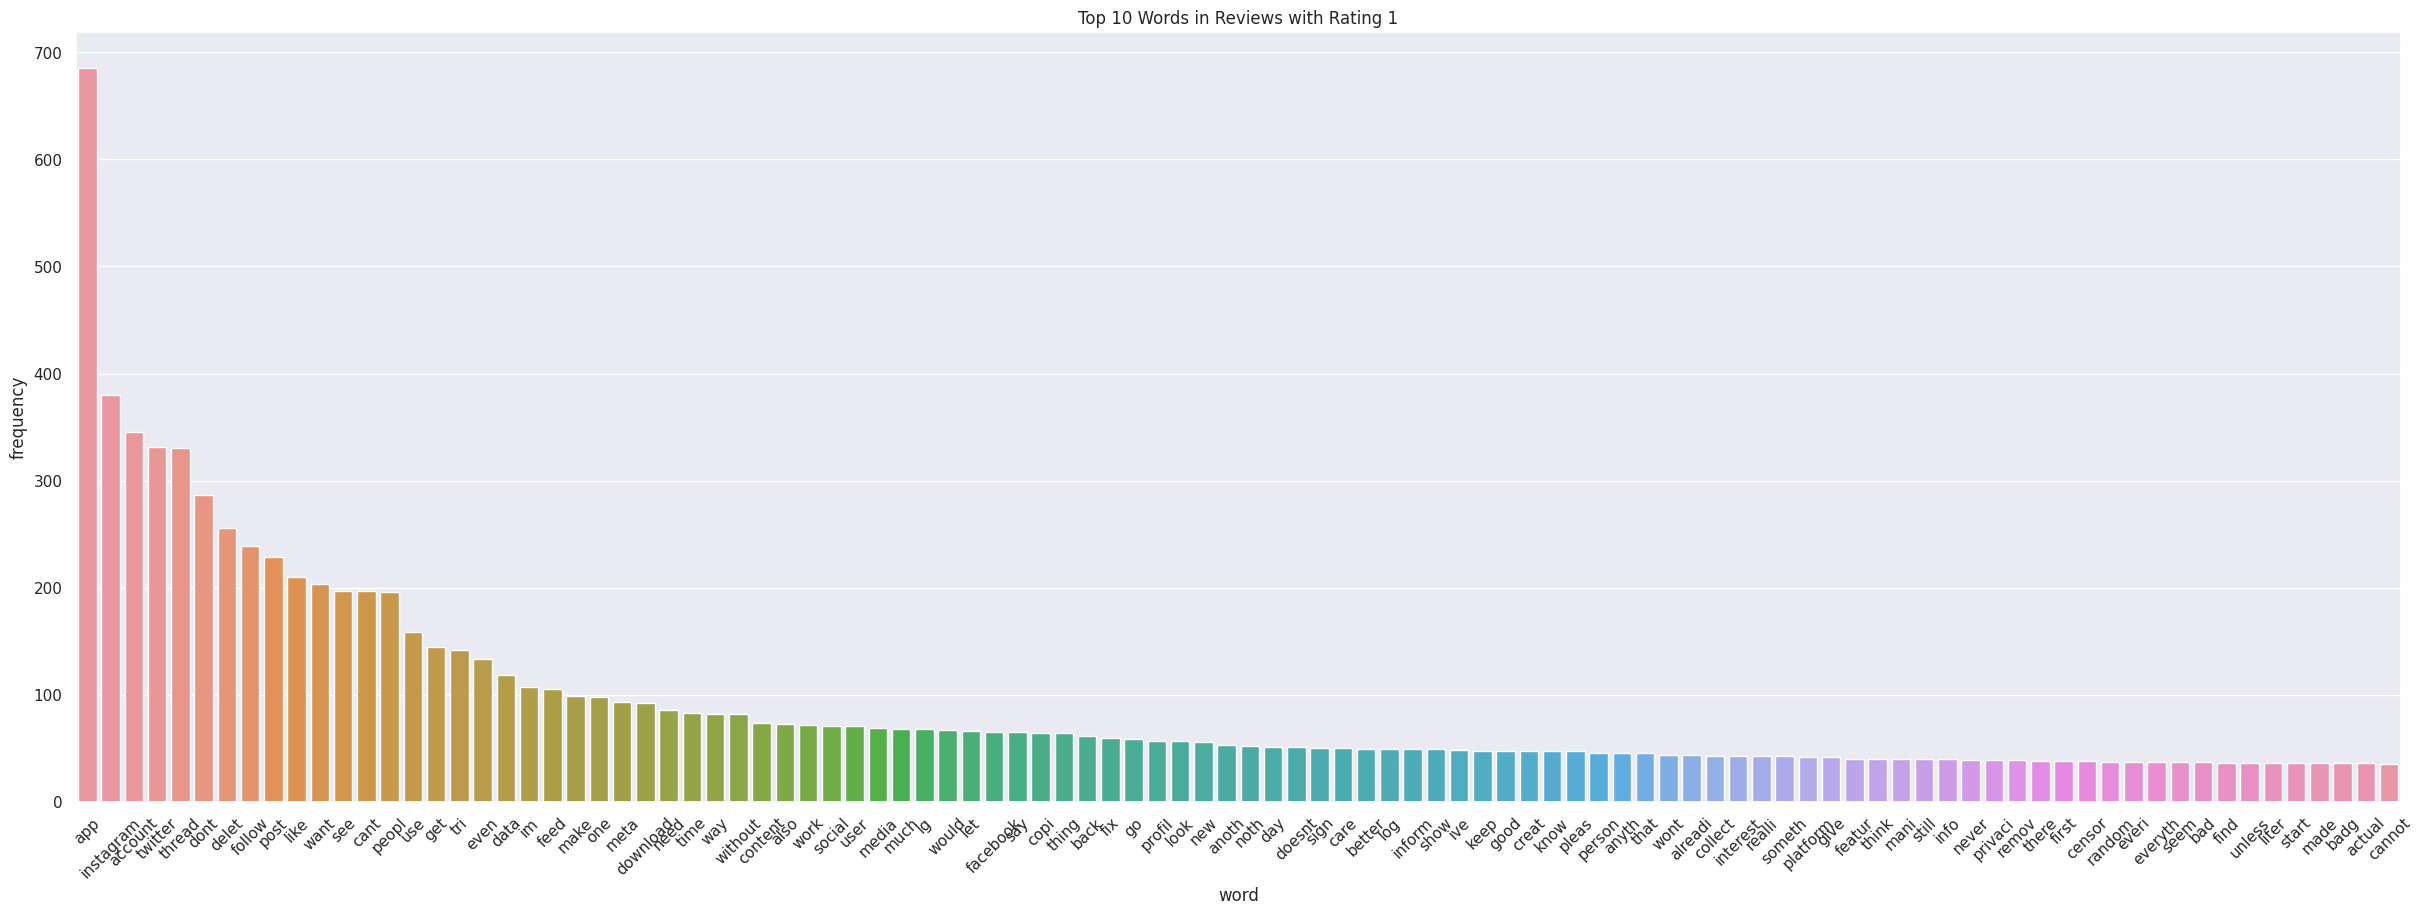

In [ ]:
visualize_appstore(3)

rating 4 star

In [ ]:
i=data[data["rating"]==4]
i4=i[i["source"]=="App Store"]
i4

source                                 review_description  rating  \
30270  App Store  Hello, I am DPM DJ. I’d like to write a somewh...       4   
30275  App Store  Downloaded yesterday and I’m enjoying it for w...       4   
30276  App Store  I expect the posts on my feed to be from only ...       4   
30280  App Store  Threads is already a hugely better app than th...       4   
30281  App Store  so far, i am enjoying this app. obviously ther...       4   
...          ...                                                ...     ...   
32730  App Store                                    We beat twitter       4   
32770  App Store                 Oh l’m the first reviewer, 5 stars       4   
32810  App Store                               Better than Twitter!       4   
32815  App Store                                 It’s a good start.       4   
32850  App Store                  Can be fun but Twitter better🤷‍♂️       4   

               review_date label  positive rating  word_count  \
30270  2023-07-07 15:58:59  good                1         218   
30275  2023-07-07 14:36:02  good                1         191   
30276  2023-07-10 20:17:51  good                1         170   
30280  2023-07-15 04:09:03  good                1         164   
30281  2023-07-07 14:45:23  good                1         143   
...                    ...   ...              ...         ...   
32730  2023-07-06 05:35:02  good                1           3   
32770  2023-07-06 01:47:50  good                1           7   
32810  2023-07-08 07:22:53  good                1           3   
32815  2023-07-13 15:31:17  good                1           4   
32850  2023-07-05 23:56:53  good                1           6   

                                         cleaned_reviews  
30270  hello dpm dj id like write somewhat seriou rev...  
30275  download yesterday im enjoy far signup super e...  
30276  expect post feed page follow get addit post po...  
30280  thread alreadi huge better app dumpster fire t...  
30281  far enjoy app obvious featur miss want good fa...  
...                                                  ...  
32730                                       beat twitter  
32770                          oh lm first review 5 star  
32810                                     better twitter  
32815                                         good start  
32850                                 fun twitter better  

[300 rows x 8 columns]

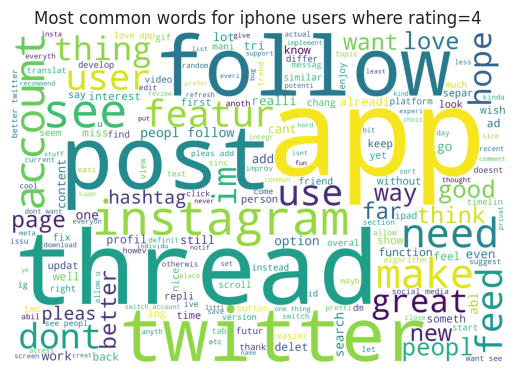

In [ ]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i4['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=4")
plt.axis('off')
plt.show()

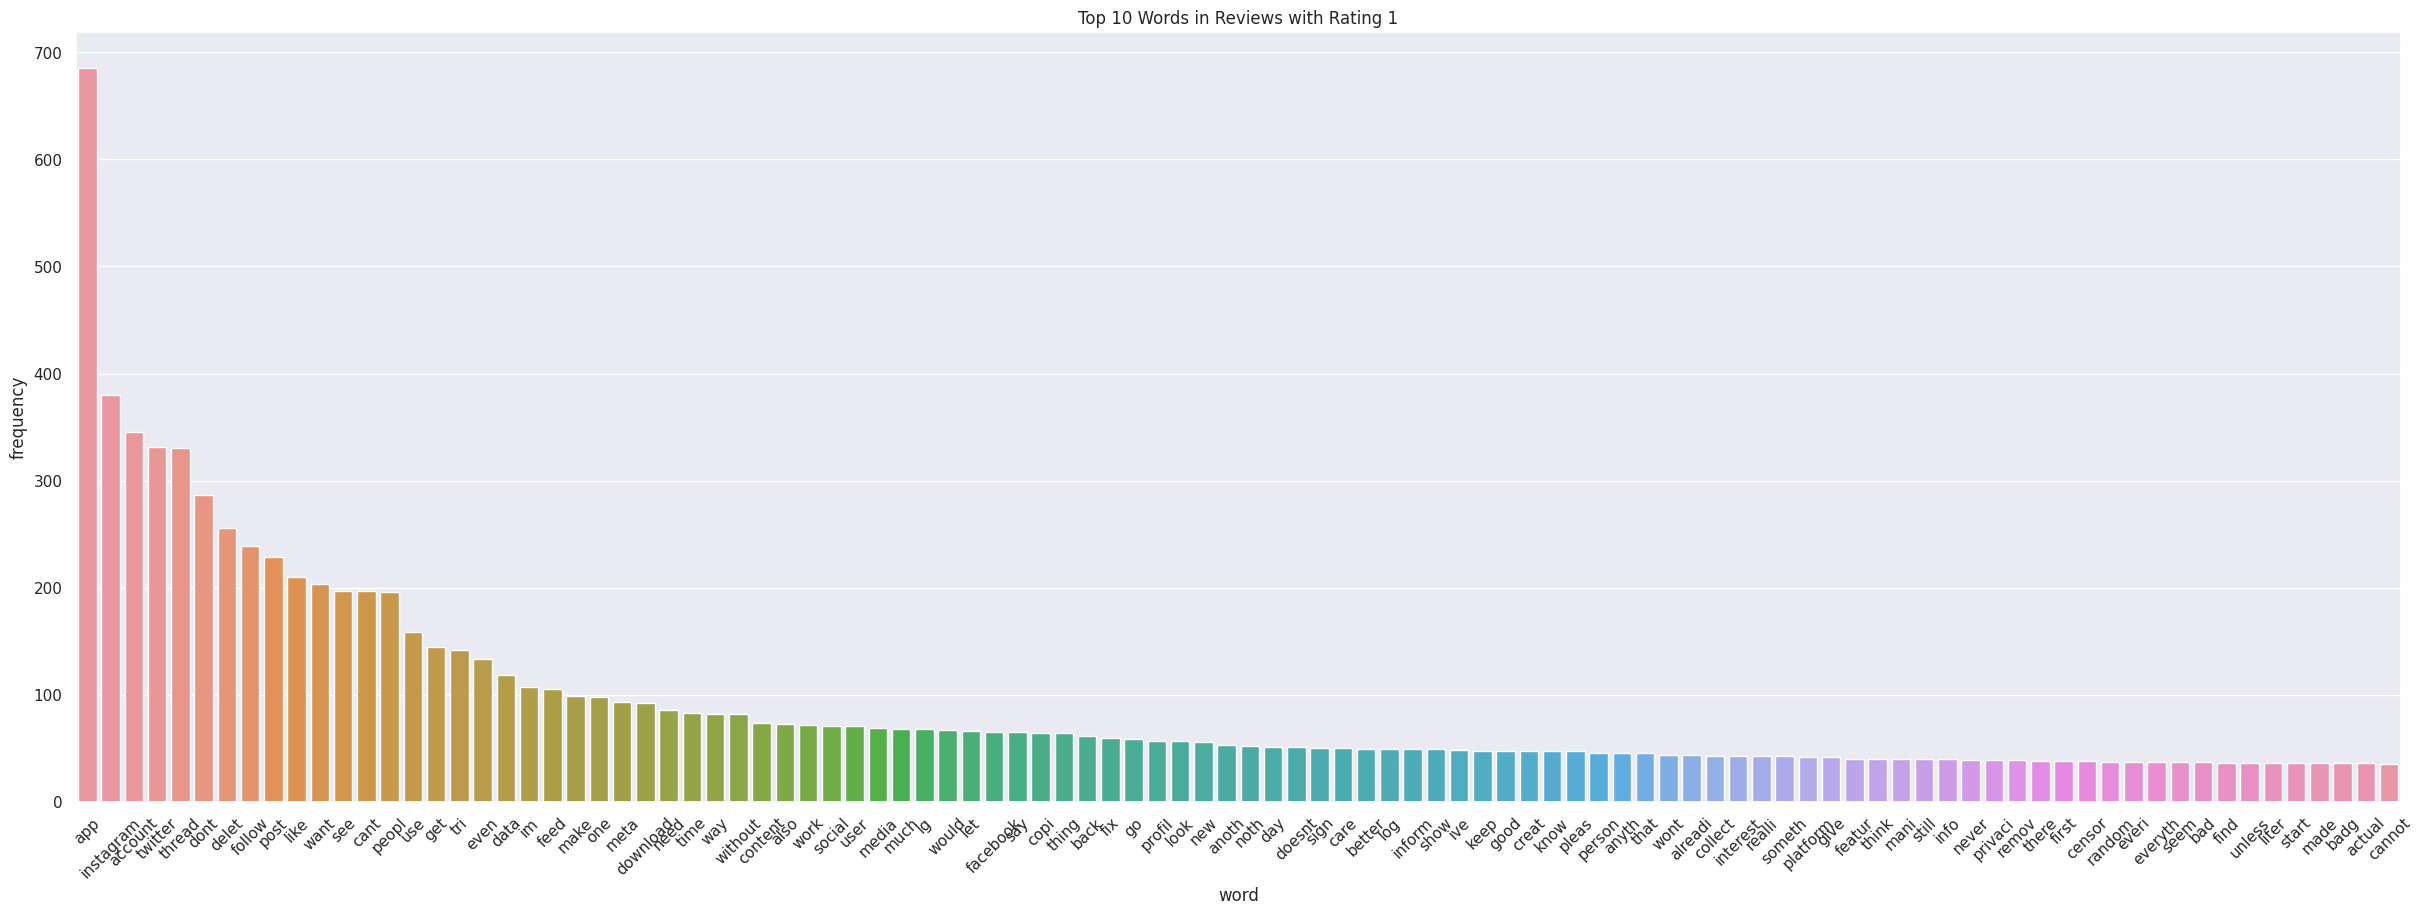

In [ ]:
visualize_appstore(4)

rating 5 star

In [ ]:
i=data[data["rating"]==5]
i5=i[i["source"]=="App Store"]
i5

source                                 review_description  rating  \
30282  App Store  Threads, an app renowned for its unique featur...       5   
30285  App Store  this is literally the better twitter. the comm...       5   
30289  App Store  A real sense of community without spam, nudity...       5   
30292  App Store  The app is obviously in its early stages, with...       5   
30303  App Store  Firstly a playback system, maybe if I double t...       5   
...          ...                                                ...     ...   
32890  App Store                              I’m done with twitter       5   
32892  App Store                               But it’s not Twitter       5   
32899  App Store                                      First review!       5   
32900  App Store                   Meta the greatest thread #mark Z       5   
32901  App Store                                      Love it w app       5   

               review_date      label  positive rating  word_count  \
30282  2023-07-06 18:52:26  excellent                1         130   
30285  2023-07-18 10:14:16  excellent                1         152   
30289  2023-07-07 04:01:26  excellent                1         150   
30292  2023-07-07 04:27:47  excellent                1         132   
30303  2023-07-07 13:26:48  excellent                1         127   
...                    ...        ...              ...         ...   
32890  2023-07-06 20:32:04  excellent                1           4   
32892  2023-07-06 00:27:27  excellent                1           4   
32899  2023-07-05 23:38:56  excellent                1           2   
32900  2023-07-05 23:37:37  excellent                1           6   
32901  2023-07-10 13:43:17  excellent                1           4   

                                         cleaned_reviews  
30282  thread app renown uniqu featur gain signific p...  
30285  liter better twitter commun less toxic app who...  
30289  real sens commun without spam nuditi gener con...  
30292  app obvious earli stage miss featur like dm tr...  
30303  firstli playback system mayb doubl tap right s...  
...                                                  ...  
32890                                    im done twitter  
32892                                            twitter  
32899                                       first review  
32900                        meta greatest thread mark z  
32901                                         love w app  

[743 rows x 8 columns]

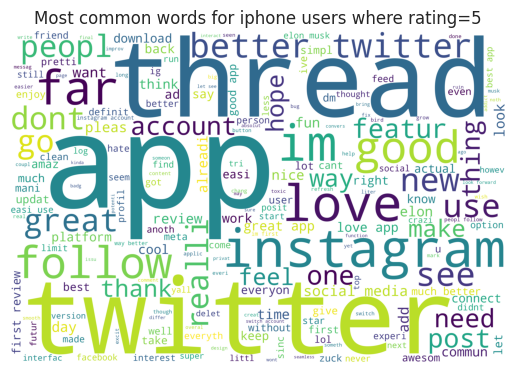

In [ ]:
wc=WordCloud(height=2000,width=3000,background_color='white')
wc=wc.generate(' '.join(i5['cleaned_reviews'].tolist()))
plt.imshow(wc)
plt.title("Most common words for iphone users where rating=5")
plt.axis('off')
plt.show()

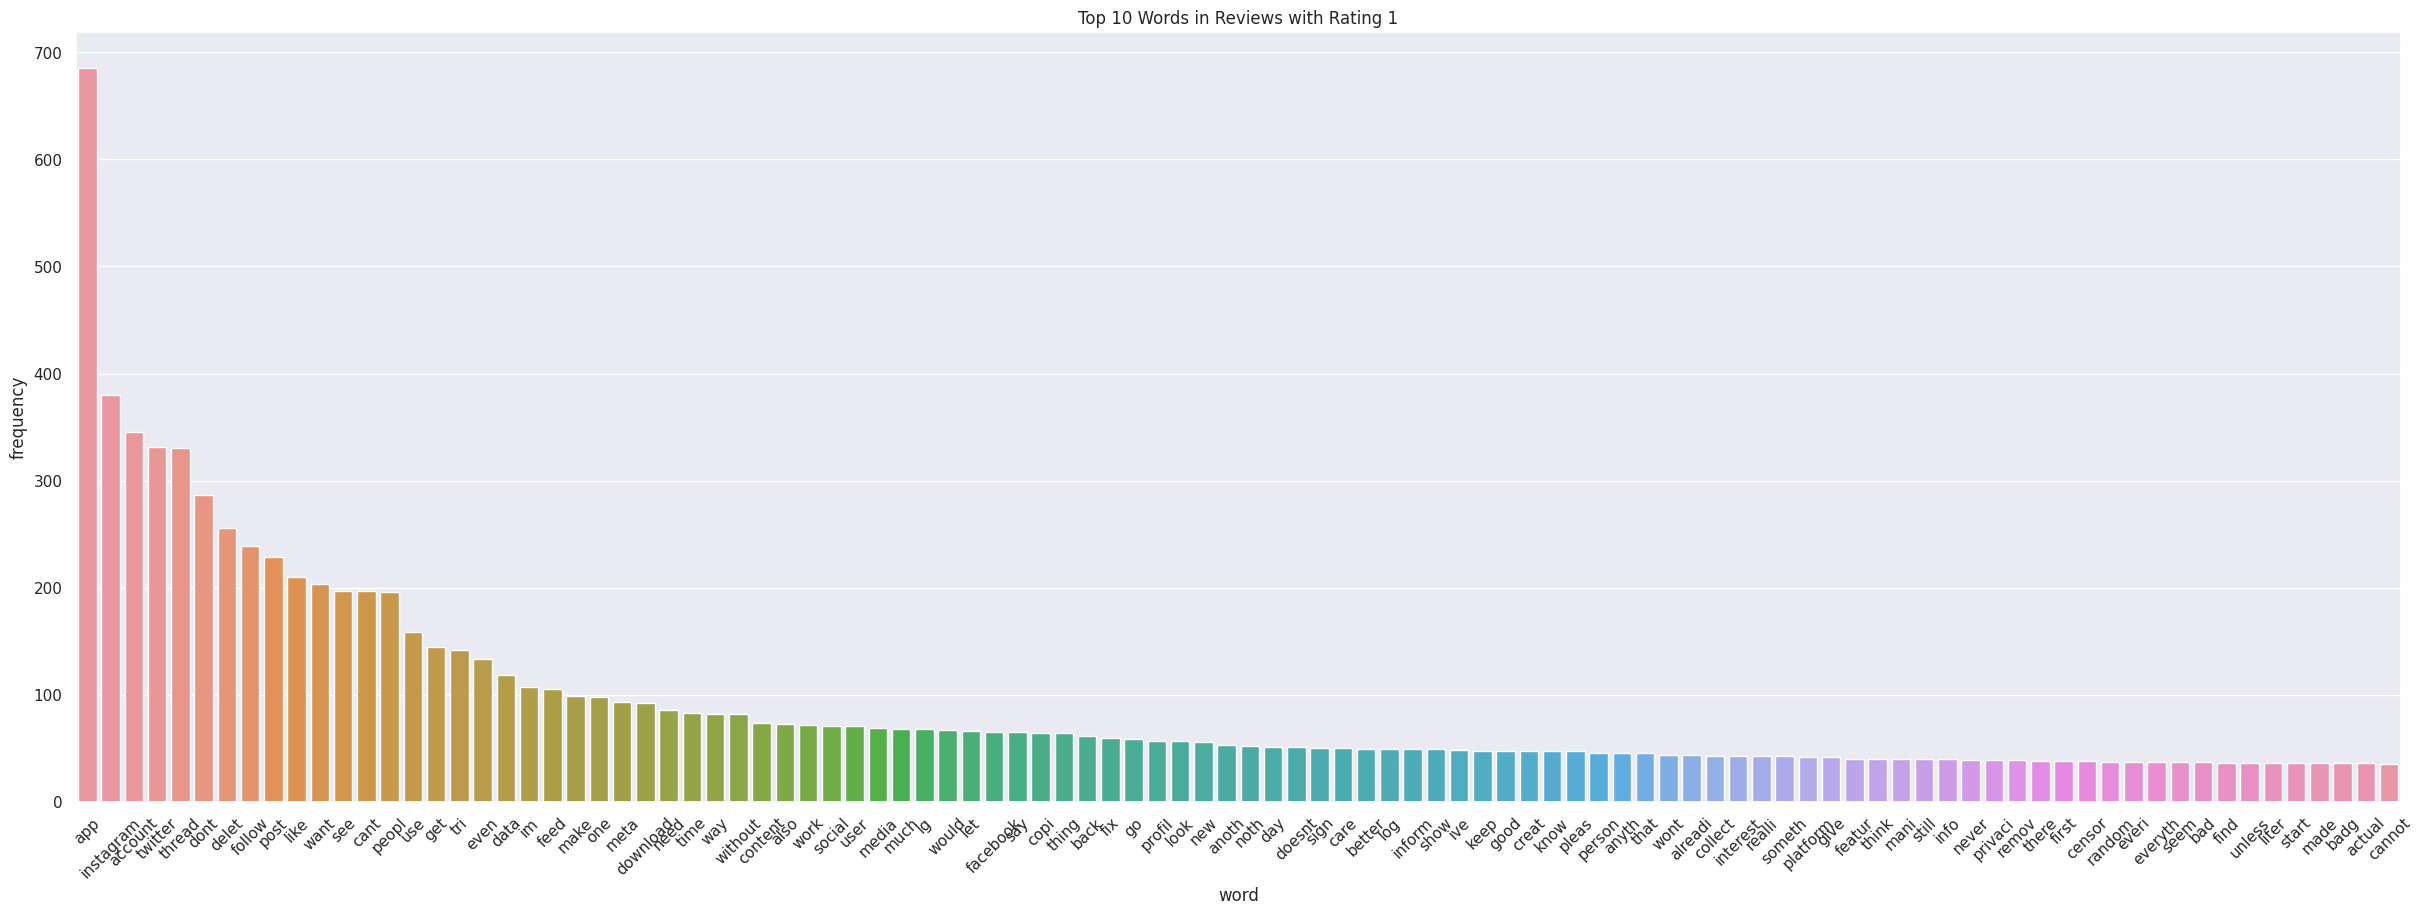

In [ ]:
visualize_appstore(5)

Sentiment Analysis (Understanding the sentiments) using -
1) vaderSentiment - VADER(Valance Aware Dictionary and sEntiment Reasoner)

Polarity score

Polarity refers to the overall sentiment conveyed by a particular text or word

This polarity can be expressed as a numerical rating known as a "sentiment score"

Postive score means postive review

Negative score means negative review

0.00 means neutral review

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
def sentiment_analyzer_scores(sentence):
  score=analyzer.polarity_scores(sentence)
  return score

In [ ]:
def compound_score(text):
  comp=sentiment_analyzer_scores(text)
  return comp['compound']

In [ ]:
data['sentiment_score'] = data['review_description'].apply(lambda x: compound_score(x))

In [ ]:
data.head()

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date label  positive rating  word_count  \
0  2023-07-08 14:18:24  poor                0          85   
1  2023-07-19 20:52:48  good                0          81   
2  2023-07-06 23:03:11  good                0          91   
3  2023-07-10 00:53:25  good                0          94   
4  2023-07-06 16:57:43  good                0          79   

                                     cleaned_reviews  sentiment_score  
0  meh greatest experi chromebook seem custom pho...          -0.7117  
1  pretti good first launch easi use selfexplanat...           0.9902  
2  brand new app well optim howev miss quit featu...           0.9076  
3  great app lot potenti howev lot need fix examp...           0.5057  
4  app good need lot function exampl search topic...           0.8860

In [ ]:
data['sentiment_score'].min()

-0.9921

In [ ]:
def sentiment_category(score):
  if score>=0.05:
    return 'positive'
  elif score<=-0.05:
    return 'negative'
  else:
    return 'neutral'

In [ ]:
data['review_category'] = data['sentiment_score'].apply(lambda x:sentiment_category(x))

In [ ]:
data.head()

source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

           review_date label  positive rating  word_count  \
0  2023-07-08 14:18:24  poor                0          85   
1  2023-07-19 20:52:48  good                0          81   
2  2023-07-06 23:03:11  good                0          91   
3  2023-07-10 00:53:25  good                0          94   
4  2023-07-06 16:57:43  good                0          79   

                                     cleaned_reviews  sentiment_score  \
0  meh greatest experi chromebook seem custom pho...          -0.7117   
1  pretti good first launch easi use selfexplanat...           0.9902   
2  brand new app well optim howev miss quit featu...           0.9076   
3  great app lot potenti howev lot need fix examp...           0.5057   
4  app good need lot function exampl search topic...           0.8860   

  review_category  
0        negative  
1        positive  
2        positive  
3        positive  
4        positive

<Axes: xlabel='review_category', ylabel='count'>

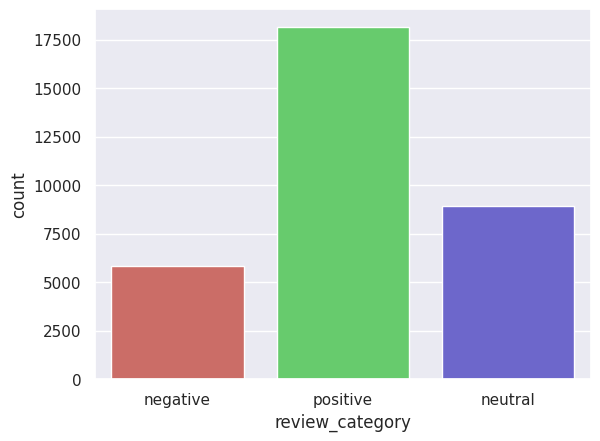

In [ ]:
sns.countplot(x='review_category',data=data,palette='hls')